# Predicting Diabetes Using Machine Learning Models on Medical and Demographic Data

### ISYE 6740 - Machine Learning I - Georgia Tech

## Import libraries and data

In [1]:
##---- Load all necessary libraries ----##

# math, df, os, misc.
import numpy as np
import pandas as pd
import math
import scipy.io
import os
import random

# preprocessing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

# algorithms
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score


# (uncomment the commands below when printing notebook to pdf)
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 300

In [2]:
# load dataset
data = pd.read_csv('diabetes_prediction_dataset.csv')
print(data.columns)
data.describe().style.format(precision=3)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


## EDA

### How much of the data is diabetic?

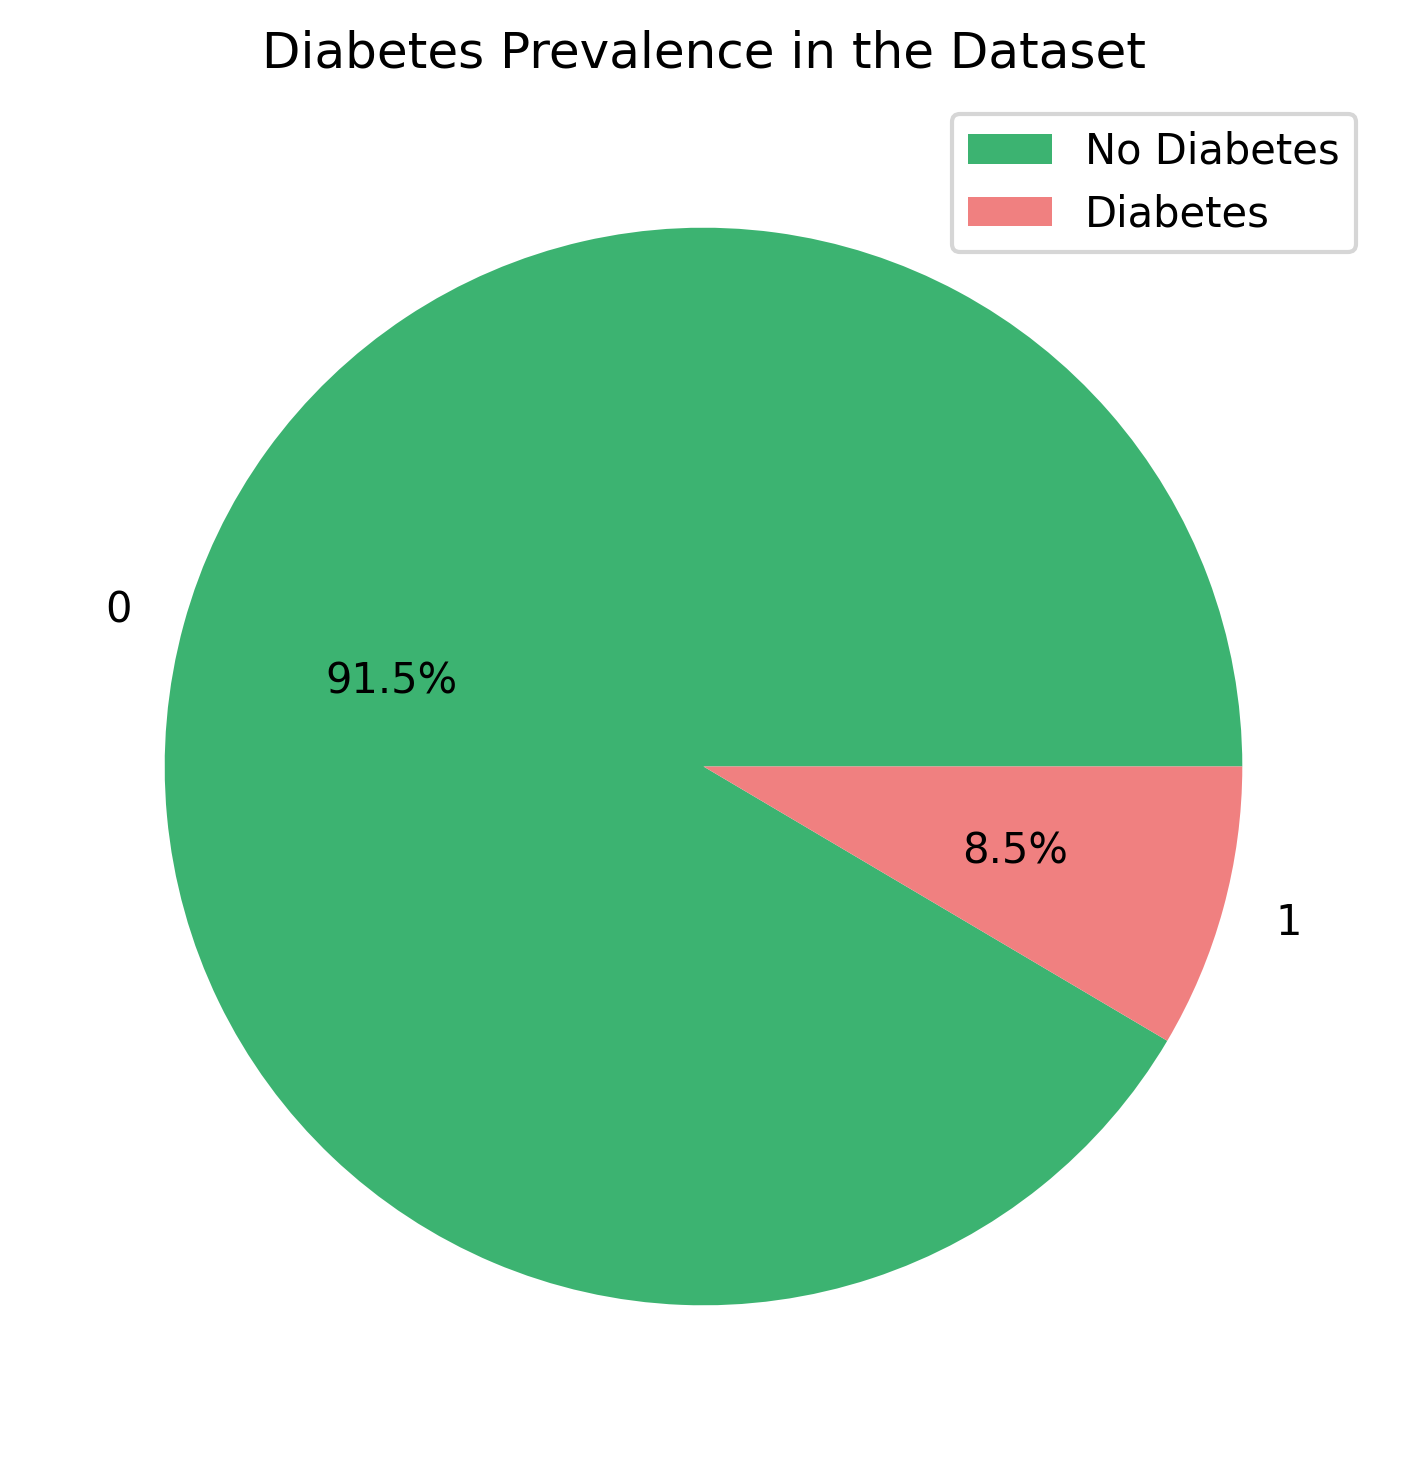

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

diabetes_counts = data['diabetes'].value_counts()

diabetes_counts.plot.pie(autopct="%1.1f%%", colors=['mediumseagreen', 'lightcoral'])

plt.title('Diabetes Prevalence in the Dataset')
plt.ylabel('')
plt.legend(['No Diabetes', 'Diabetes'])
plt.tight_layout()
plt.show()

### Distributions of numerical features

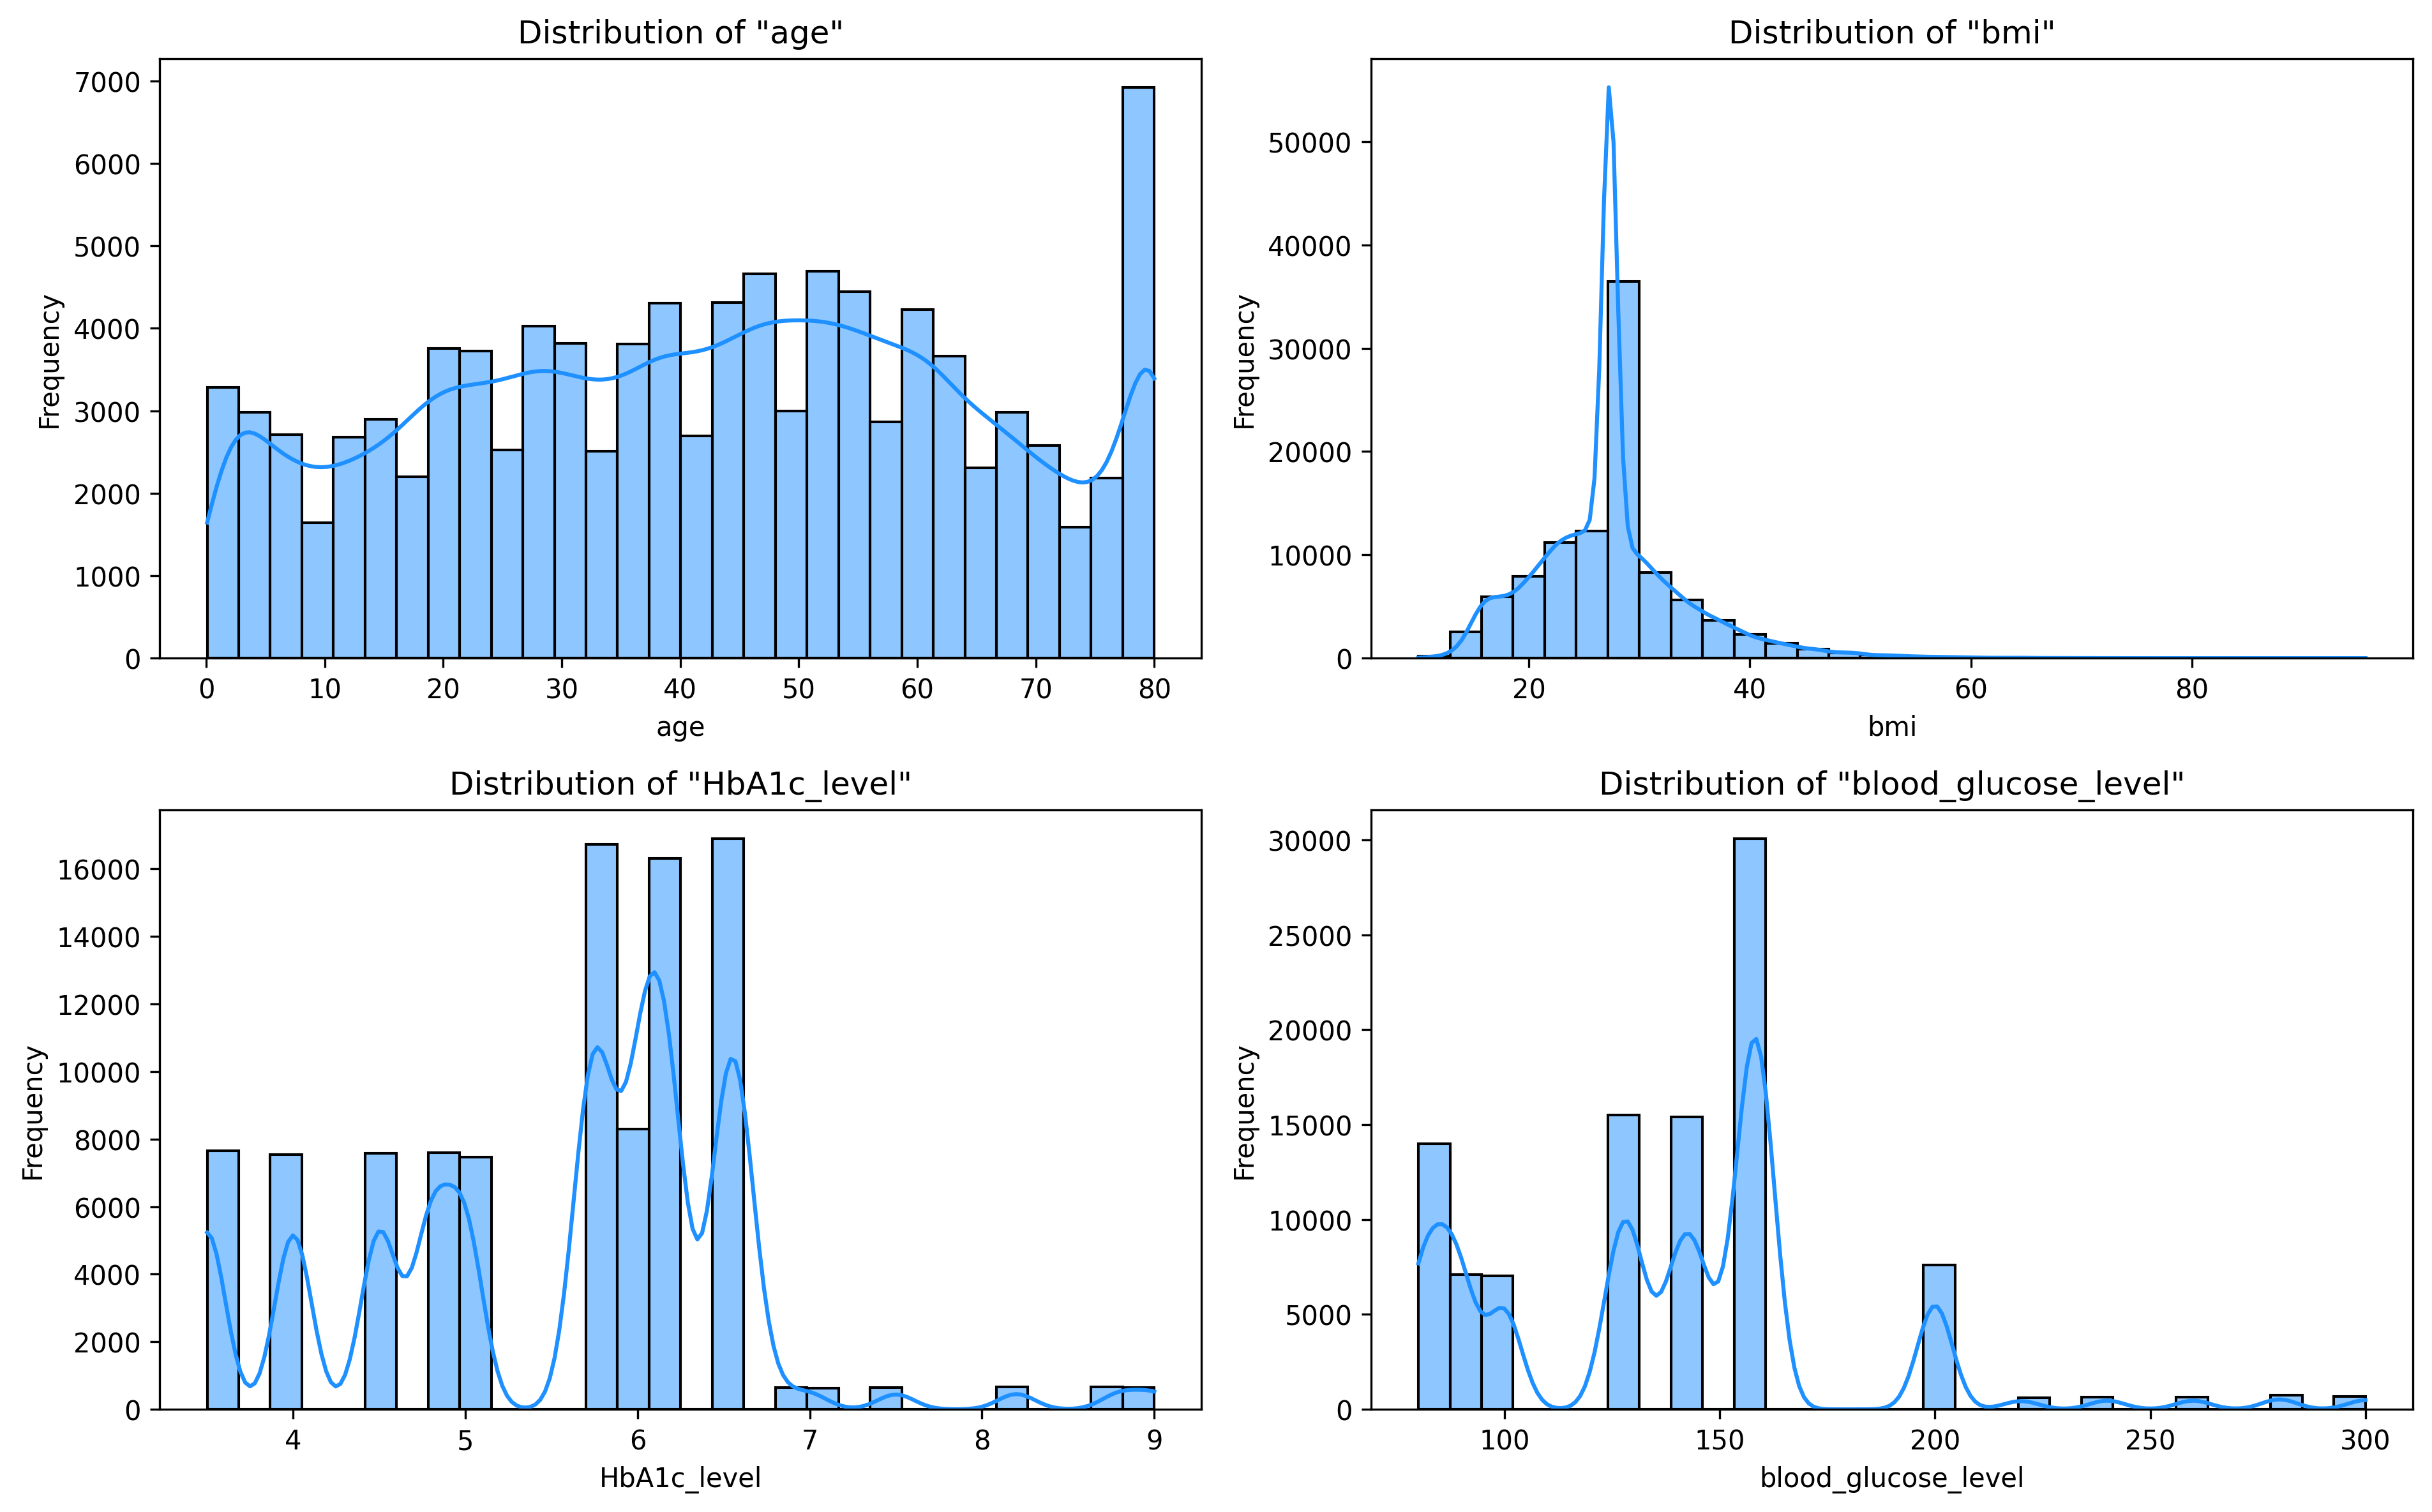

In [4]:
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12.8, 8))

for i, feature in enumerate(numerical_features):
    ax = axes[i // 2, i % 2]
    sns.histplot(data[feature], bins=30, kde=True, ax=ax, color = 'dodgerblue')
    ax.set_title(f'Distribution of "{feature}"')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

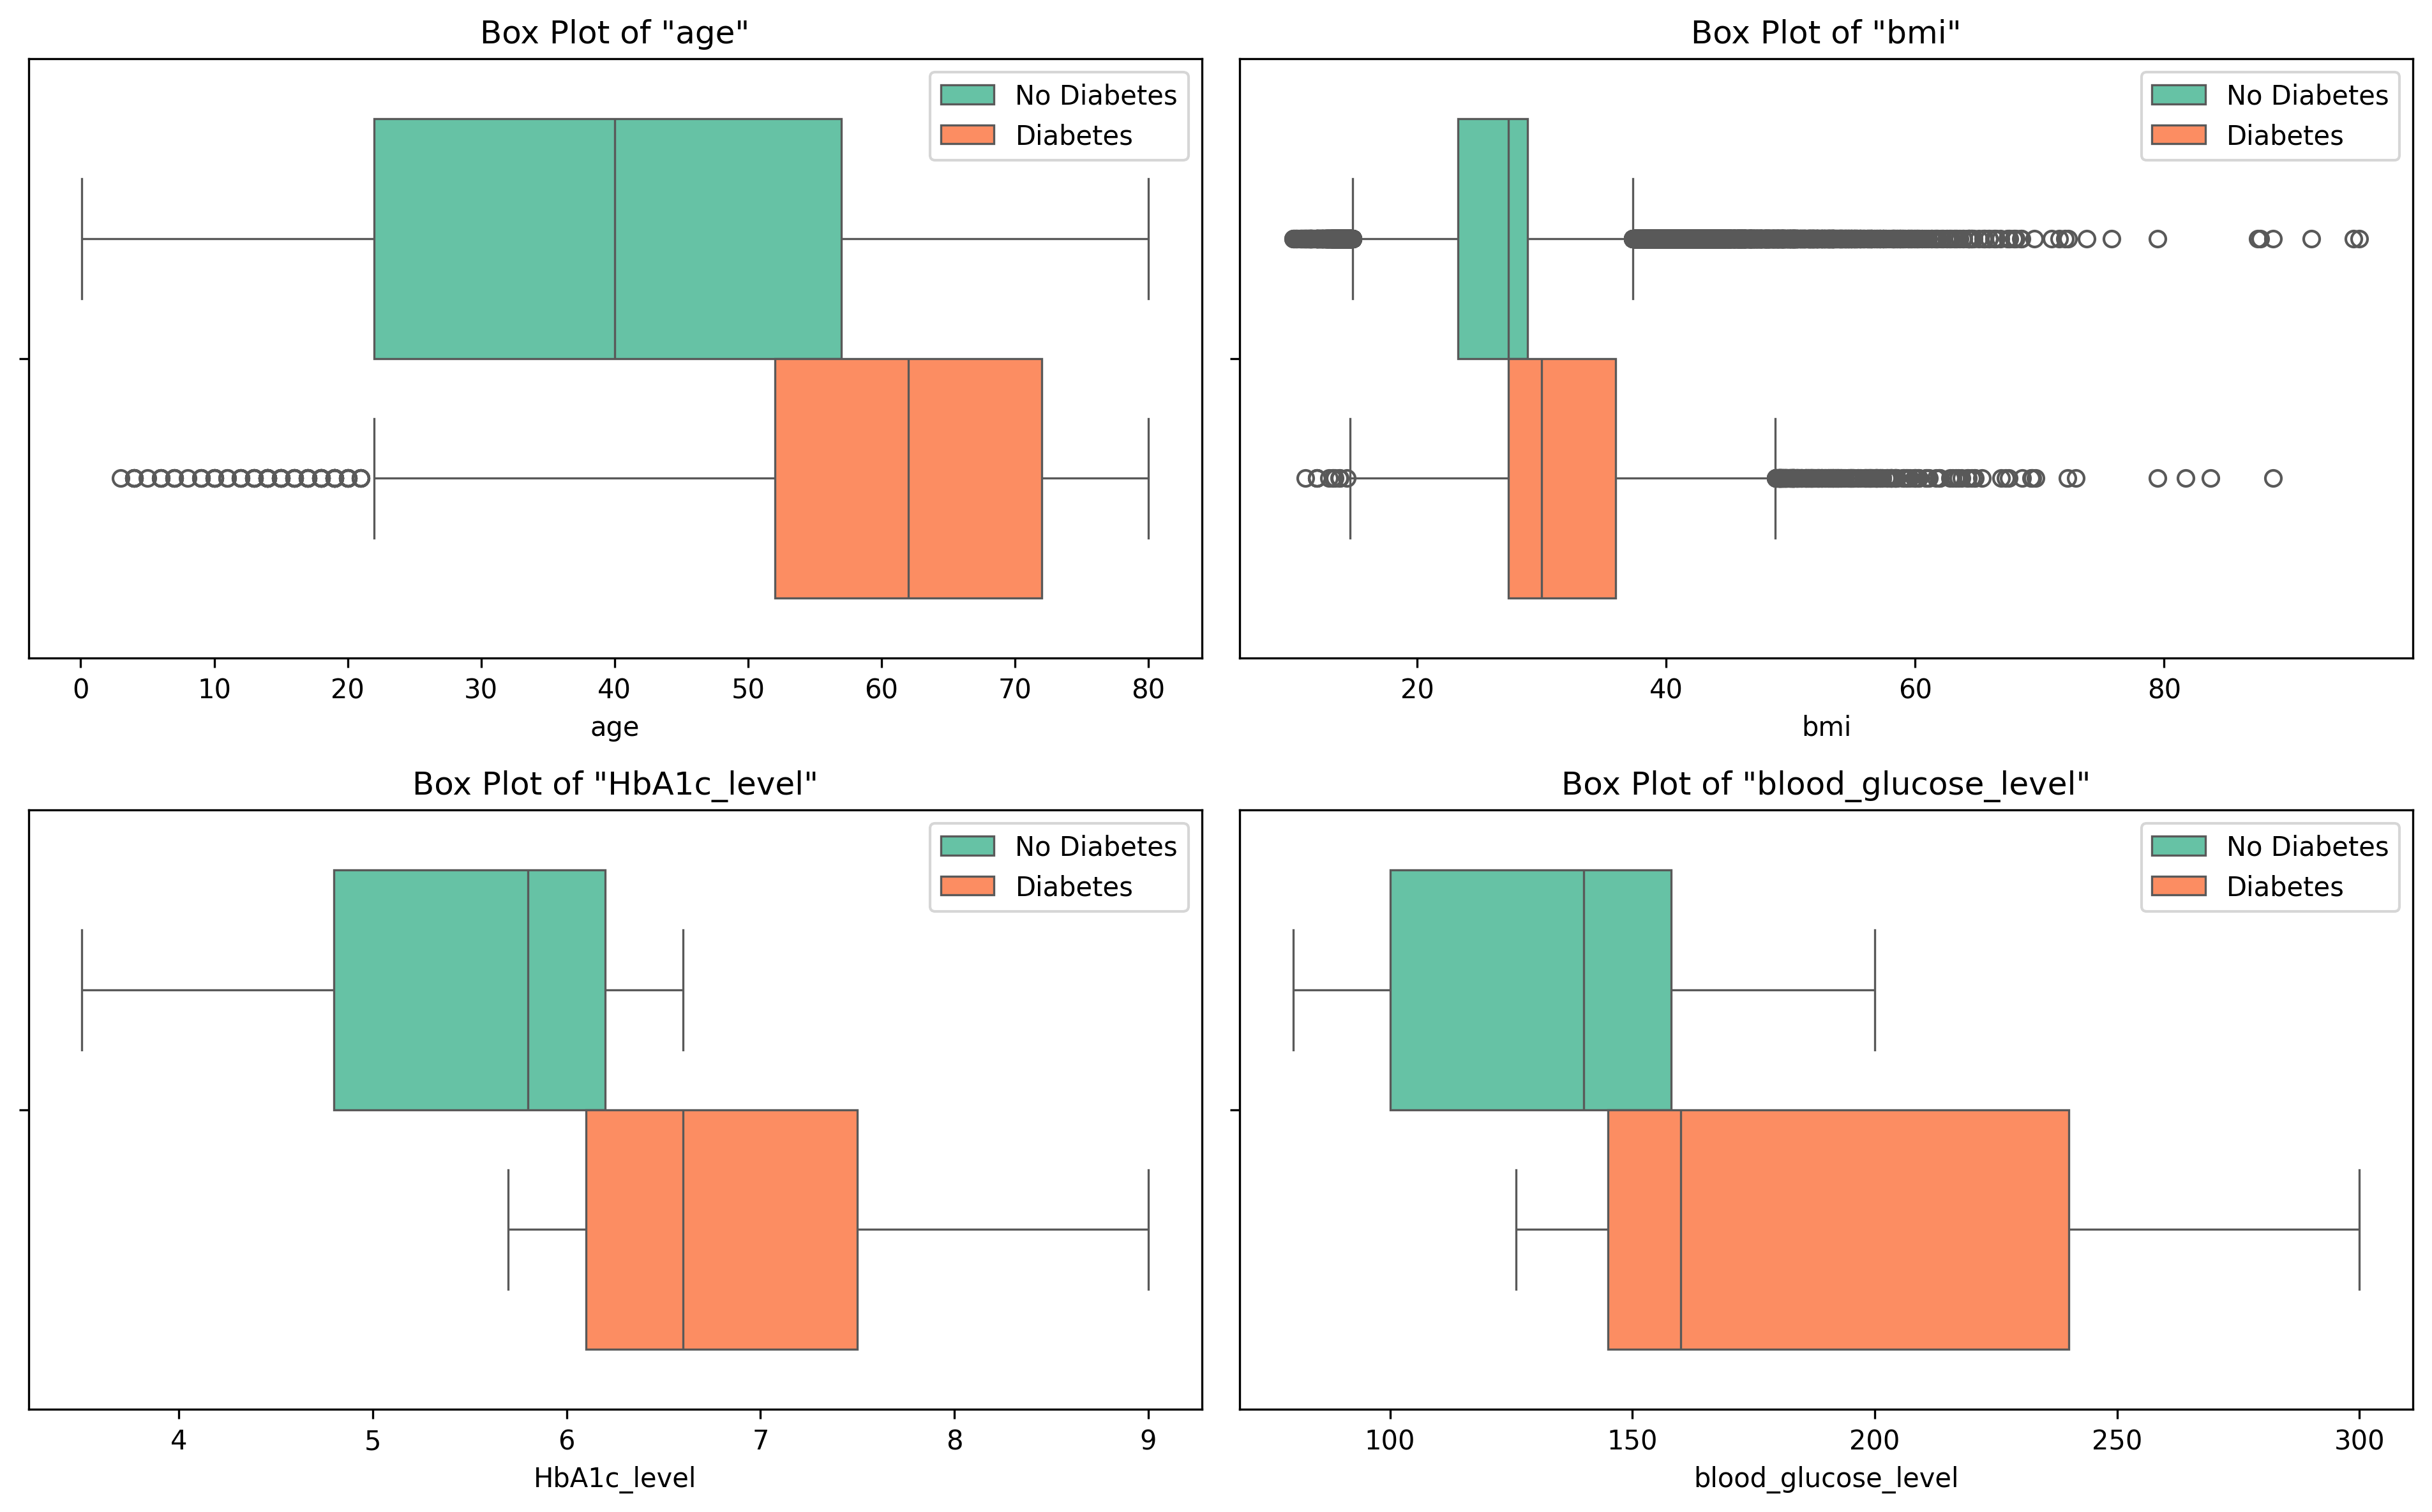

In [5]:
# Create box plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12.8, 8))

for i, feature in enumerate(numerical_features):
    ax = axes[i // 2, i % 2]
    sns.boxplot(x=data[feature], ax=ax, hue = data['diabetes'], palette='Set2', linewidth = 0.8, saturation = 1)
    ax.set_title(f'Box Plot of "{feature}"')
    ax.set_xlabel(feature)
    ax.legend(labels=['No Diabetes', 'Diabetes'])
plt.tight_layout()
plt.show()


### Bar plots of binary features

In [6]:
def add_percentages():
    total = len(data)
    
    for rect in ax.patches:
        height = rect.get_height()
        percentage = round((height / total) * 100, 2)
        ax.text(rect.get_x() + rect.get_width() / 2., height + 0.05, f'{percentage}%', ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

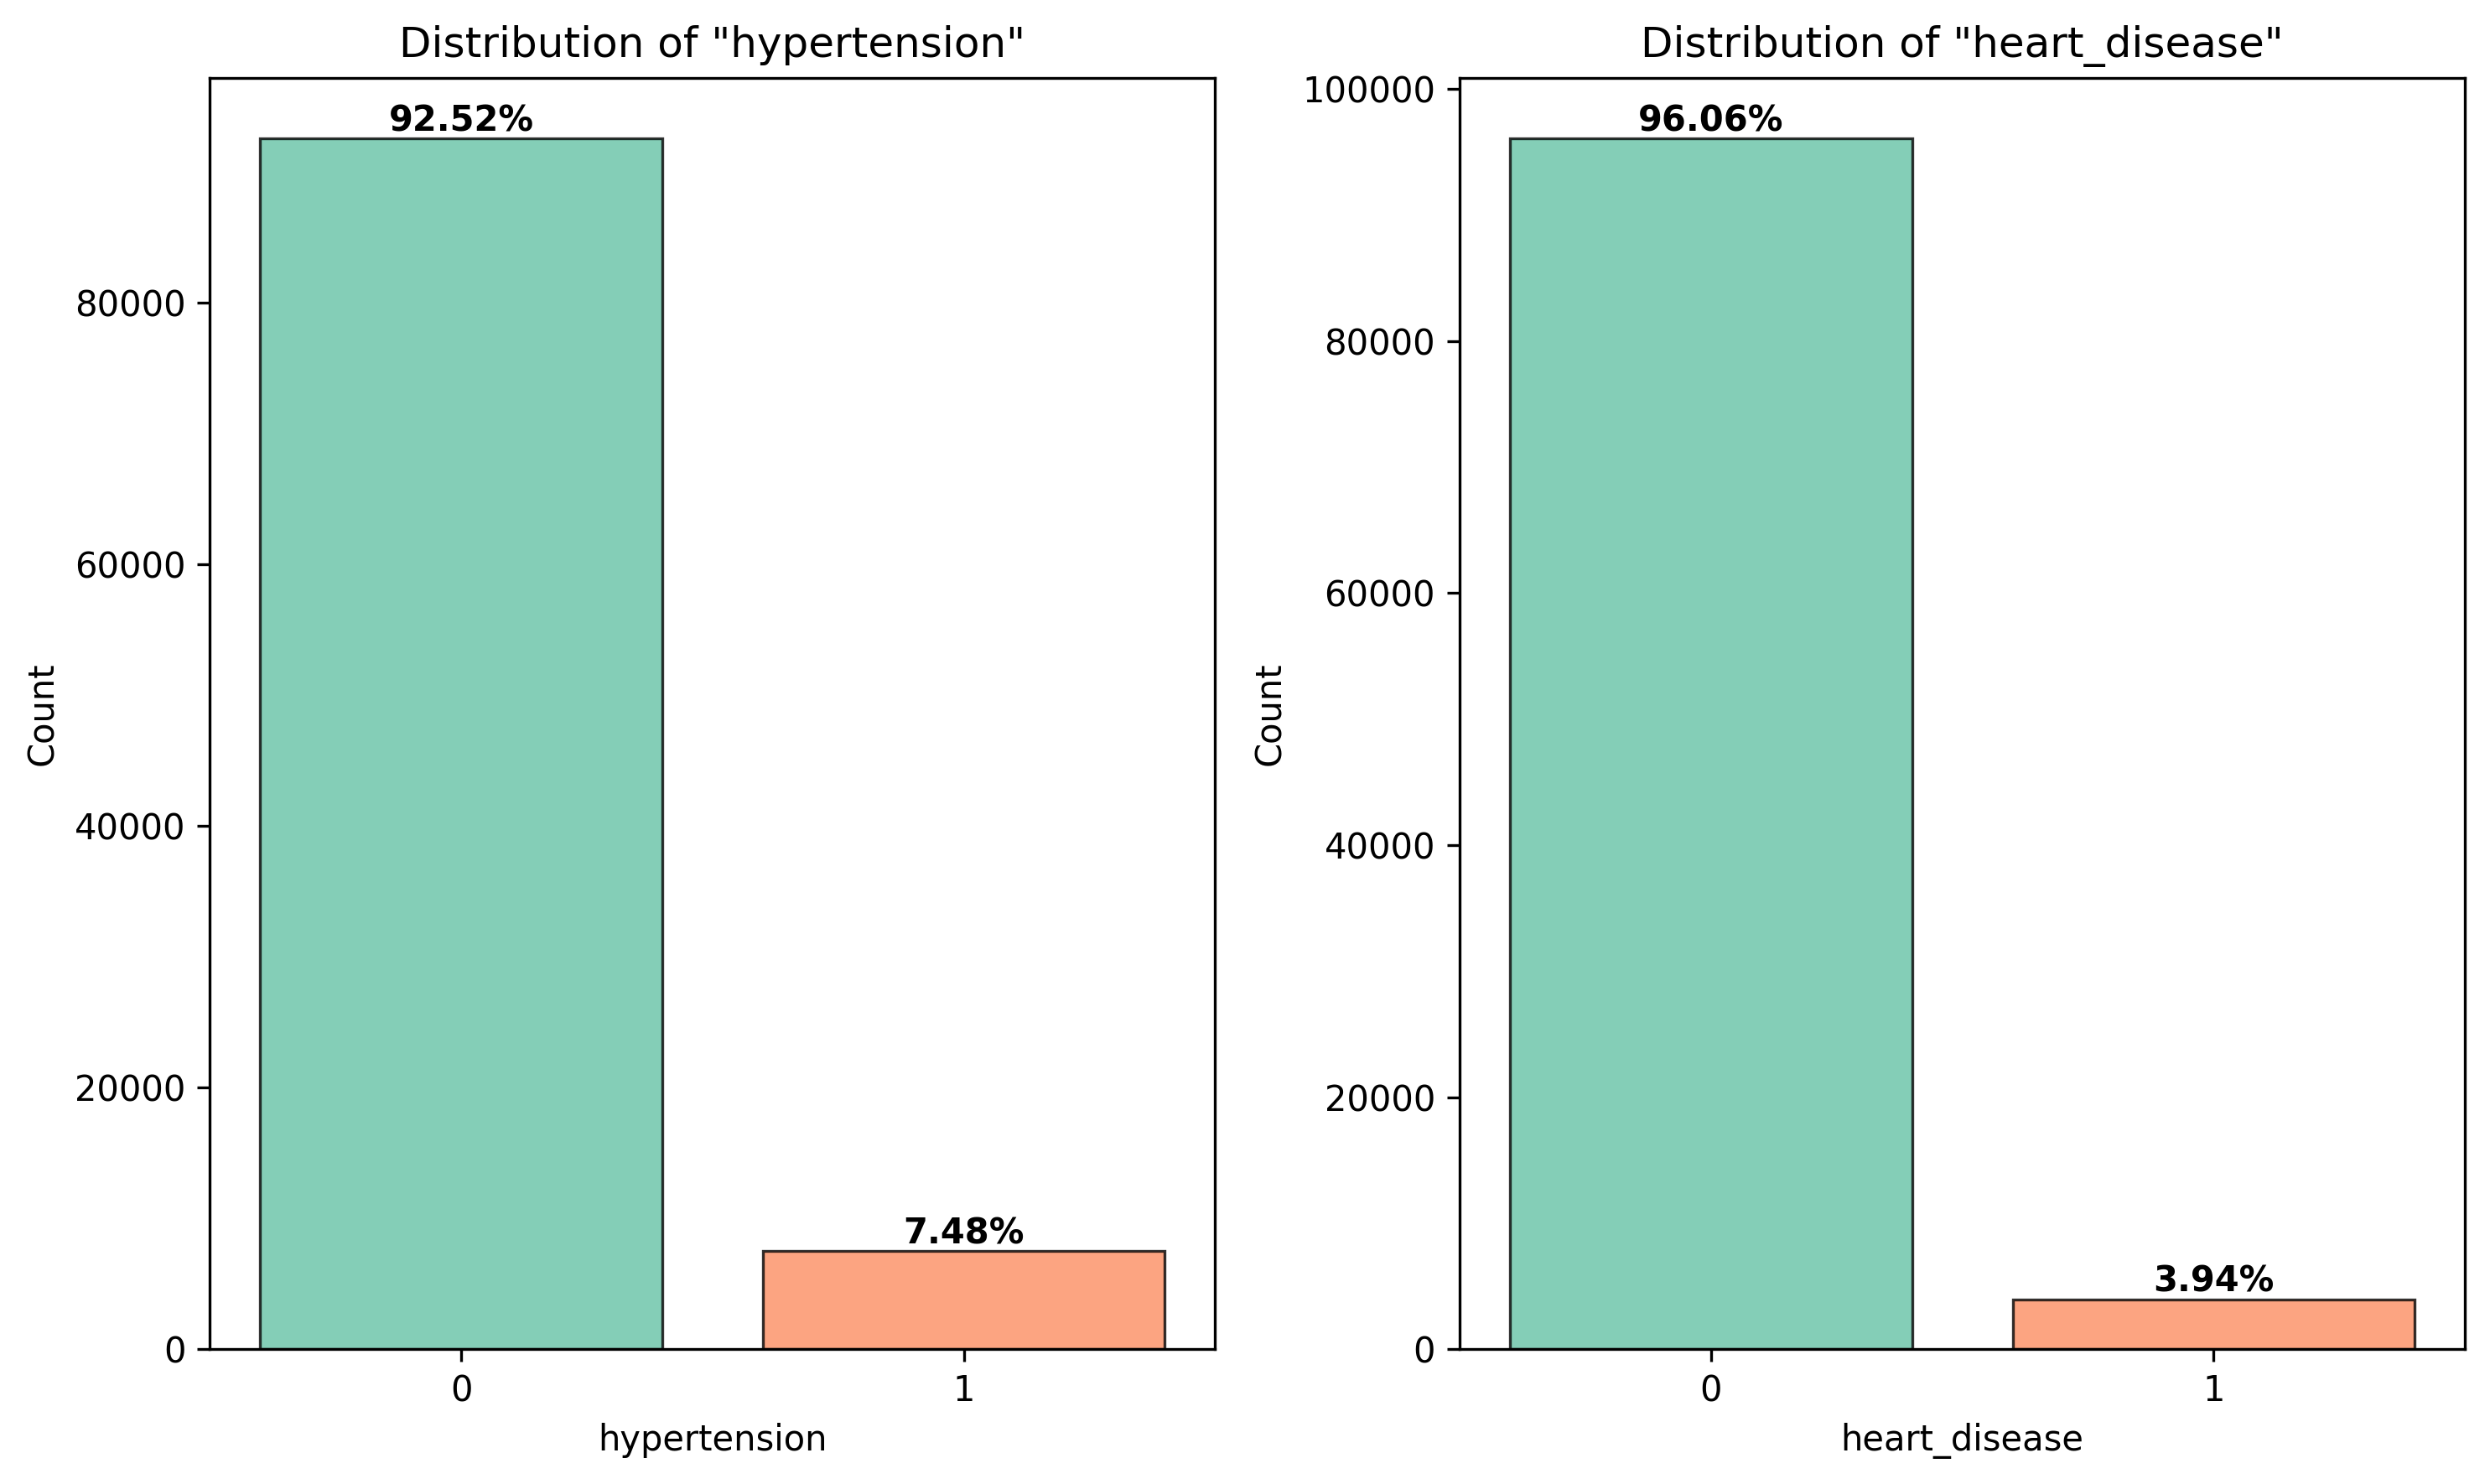

In [7]:
binary_vars = ['hypertension', 'heart_disease']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

for i, var in enumerate(binary_vars):
    ax = axes[i]
    
    sns.countplot(x=var, data=data, ax=ax, palette='Set2', linewidth = 0.8, alpha = 0.8, edgecolor = 'k', saturation = 1)
    
    add_percentages()
    
    ax.set_title(f'Distribution of "{var}"')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


### Bar plots of categorical features

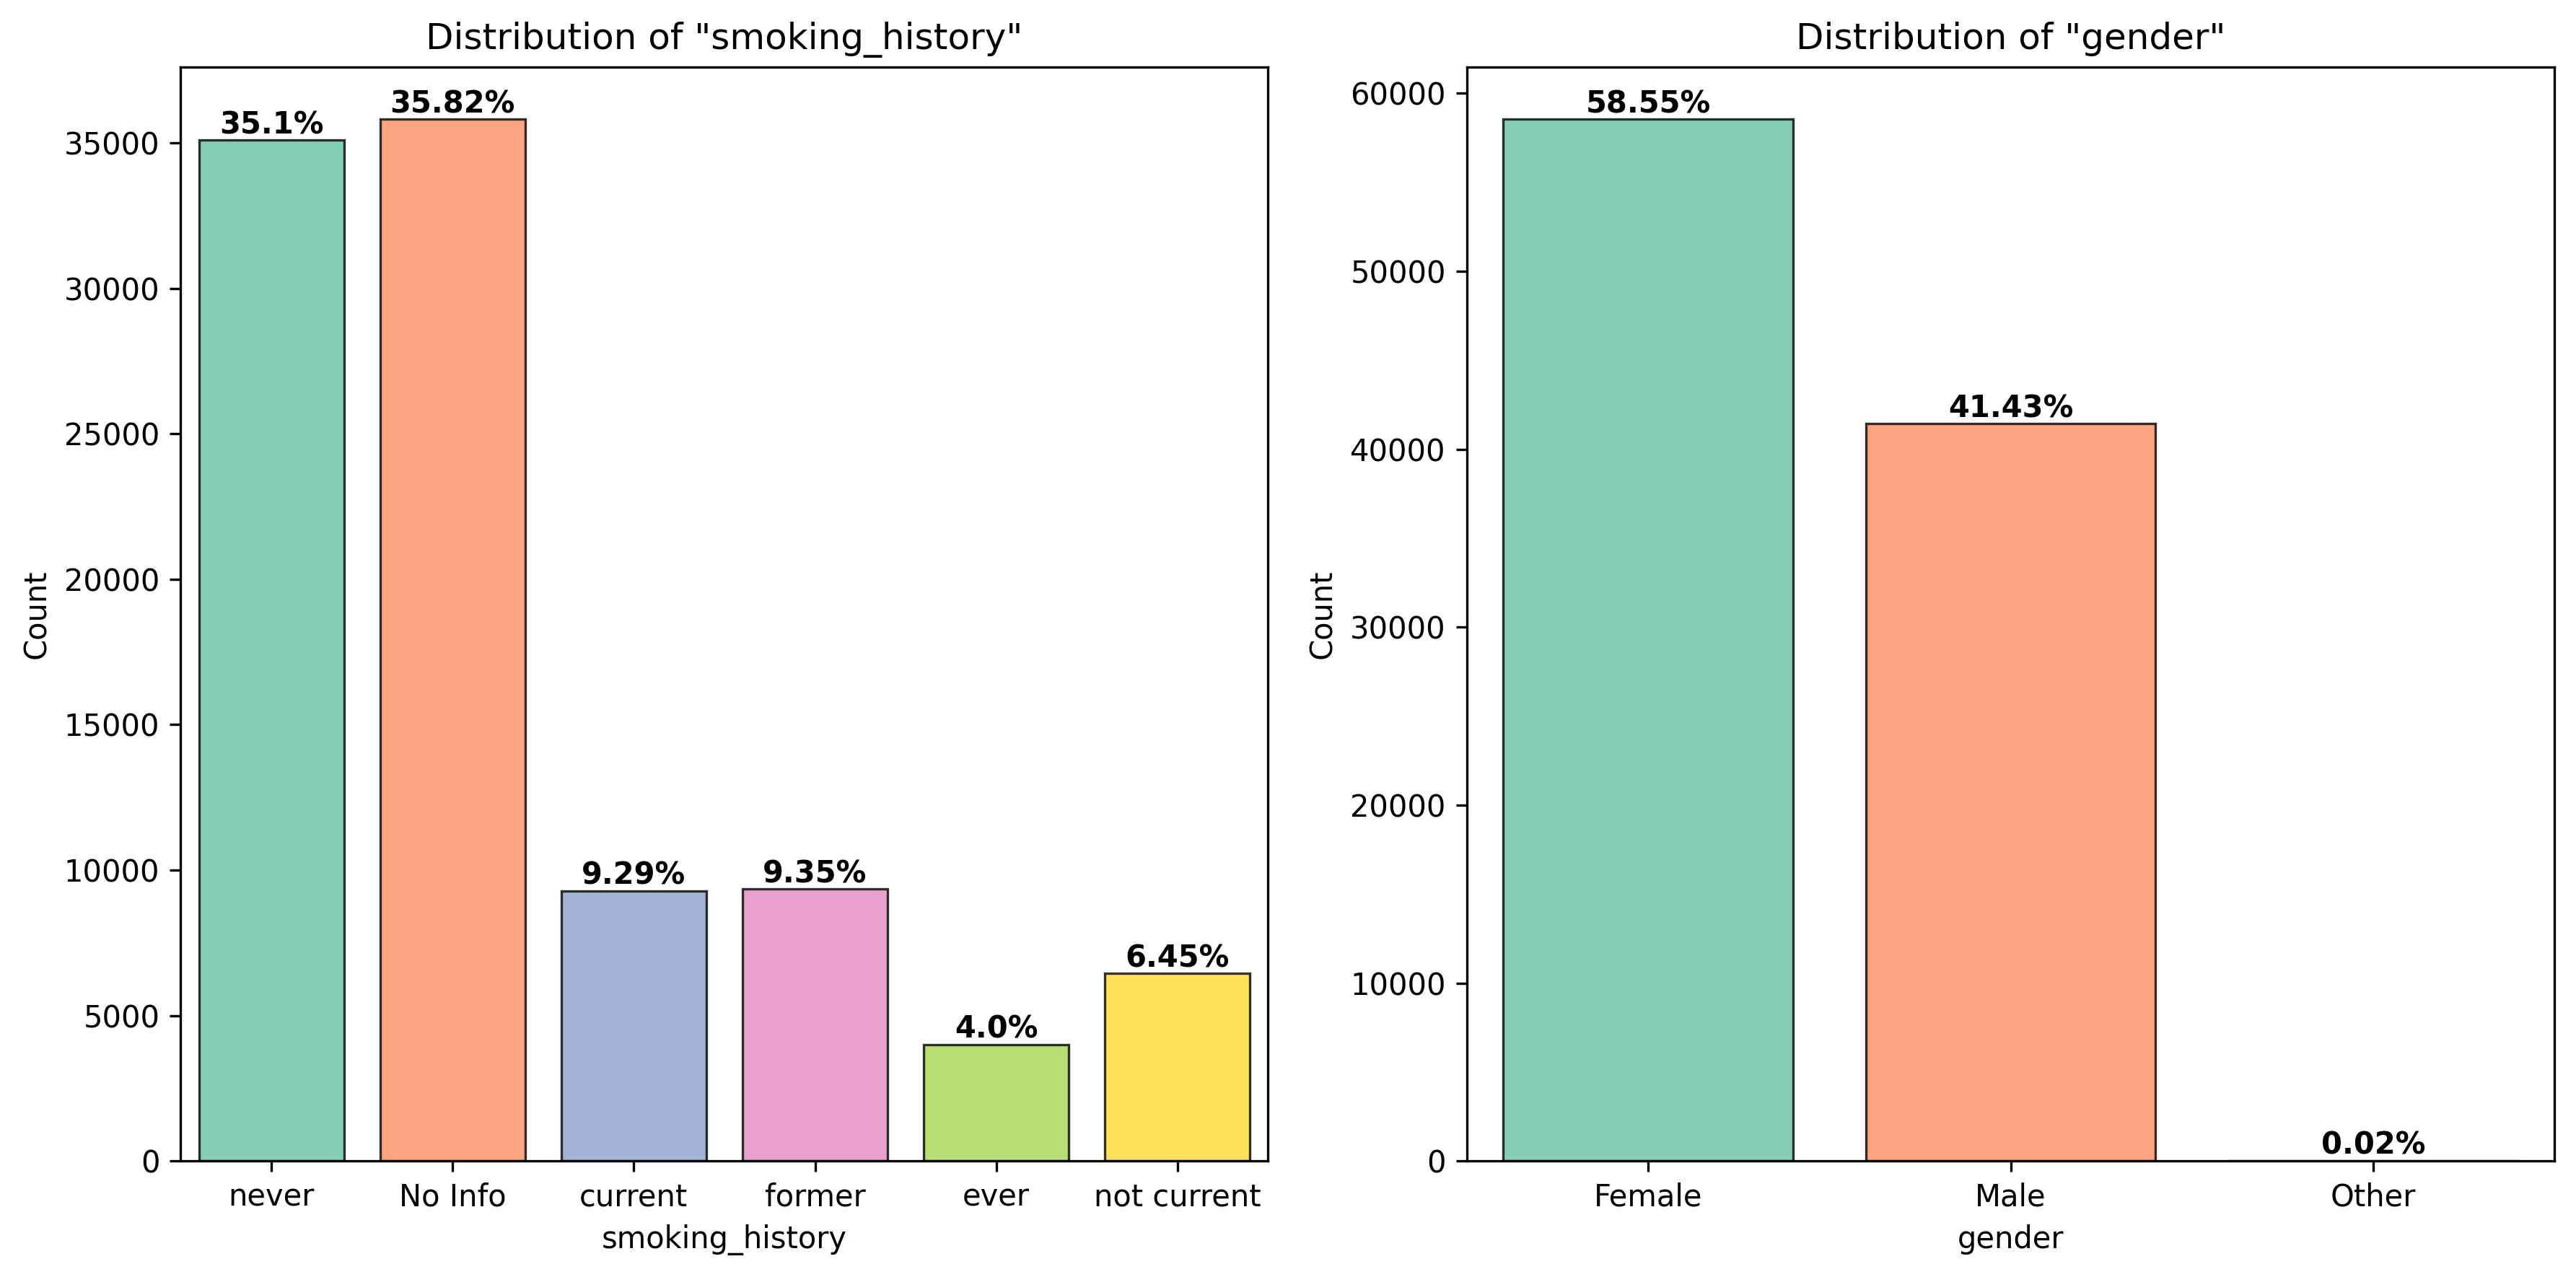

In [8]:
categorical_vars = ['smoking_history', 'gender']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, var in enumerate(categorical_vars):
    ax = axes[i]

    sns.countplot(x=var, data=data, ax=ax, hue=var, palette='Set2', linewidth = 0.8, alpha = 0.8, edgecolor = 'k', saturation = 1)
    
    add_percentages()

    ax.set_title(f'Distribution of "{var}"')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

### Various Features vs Diabetes

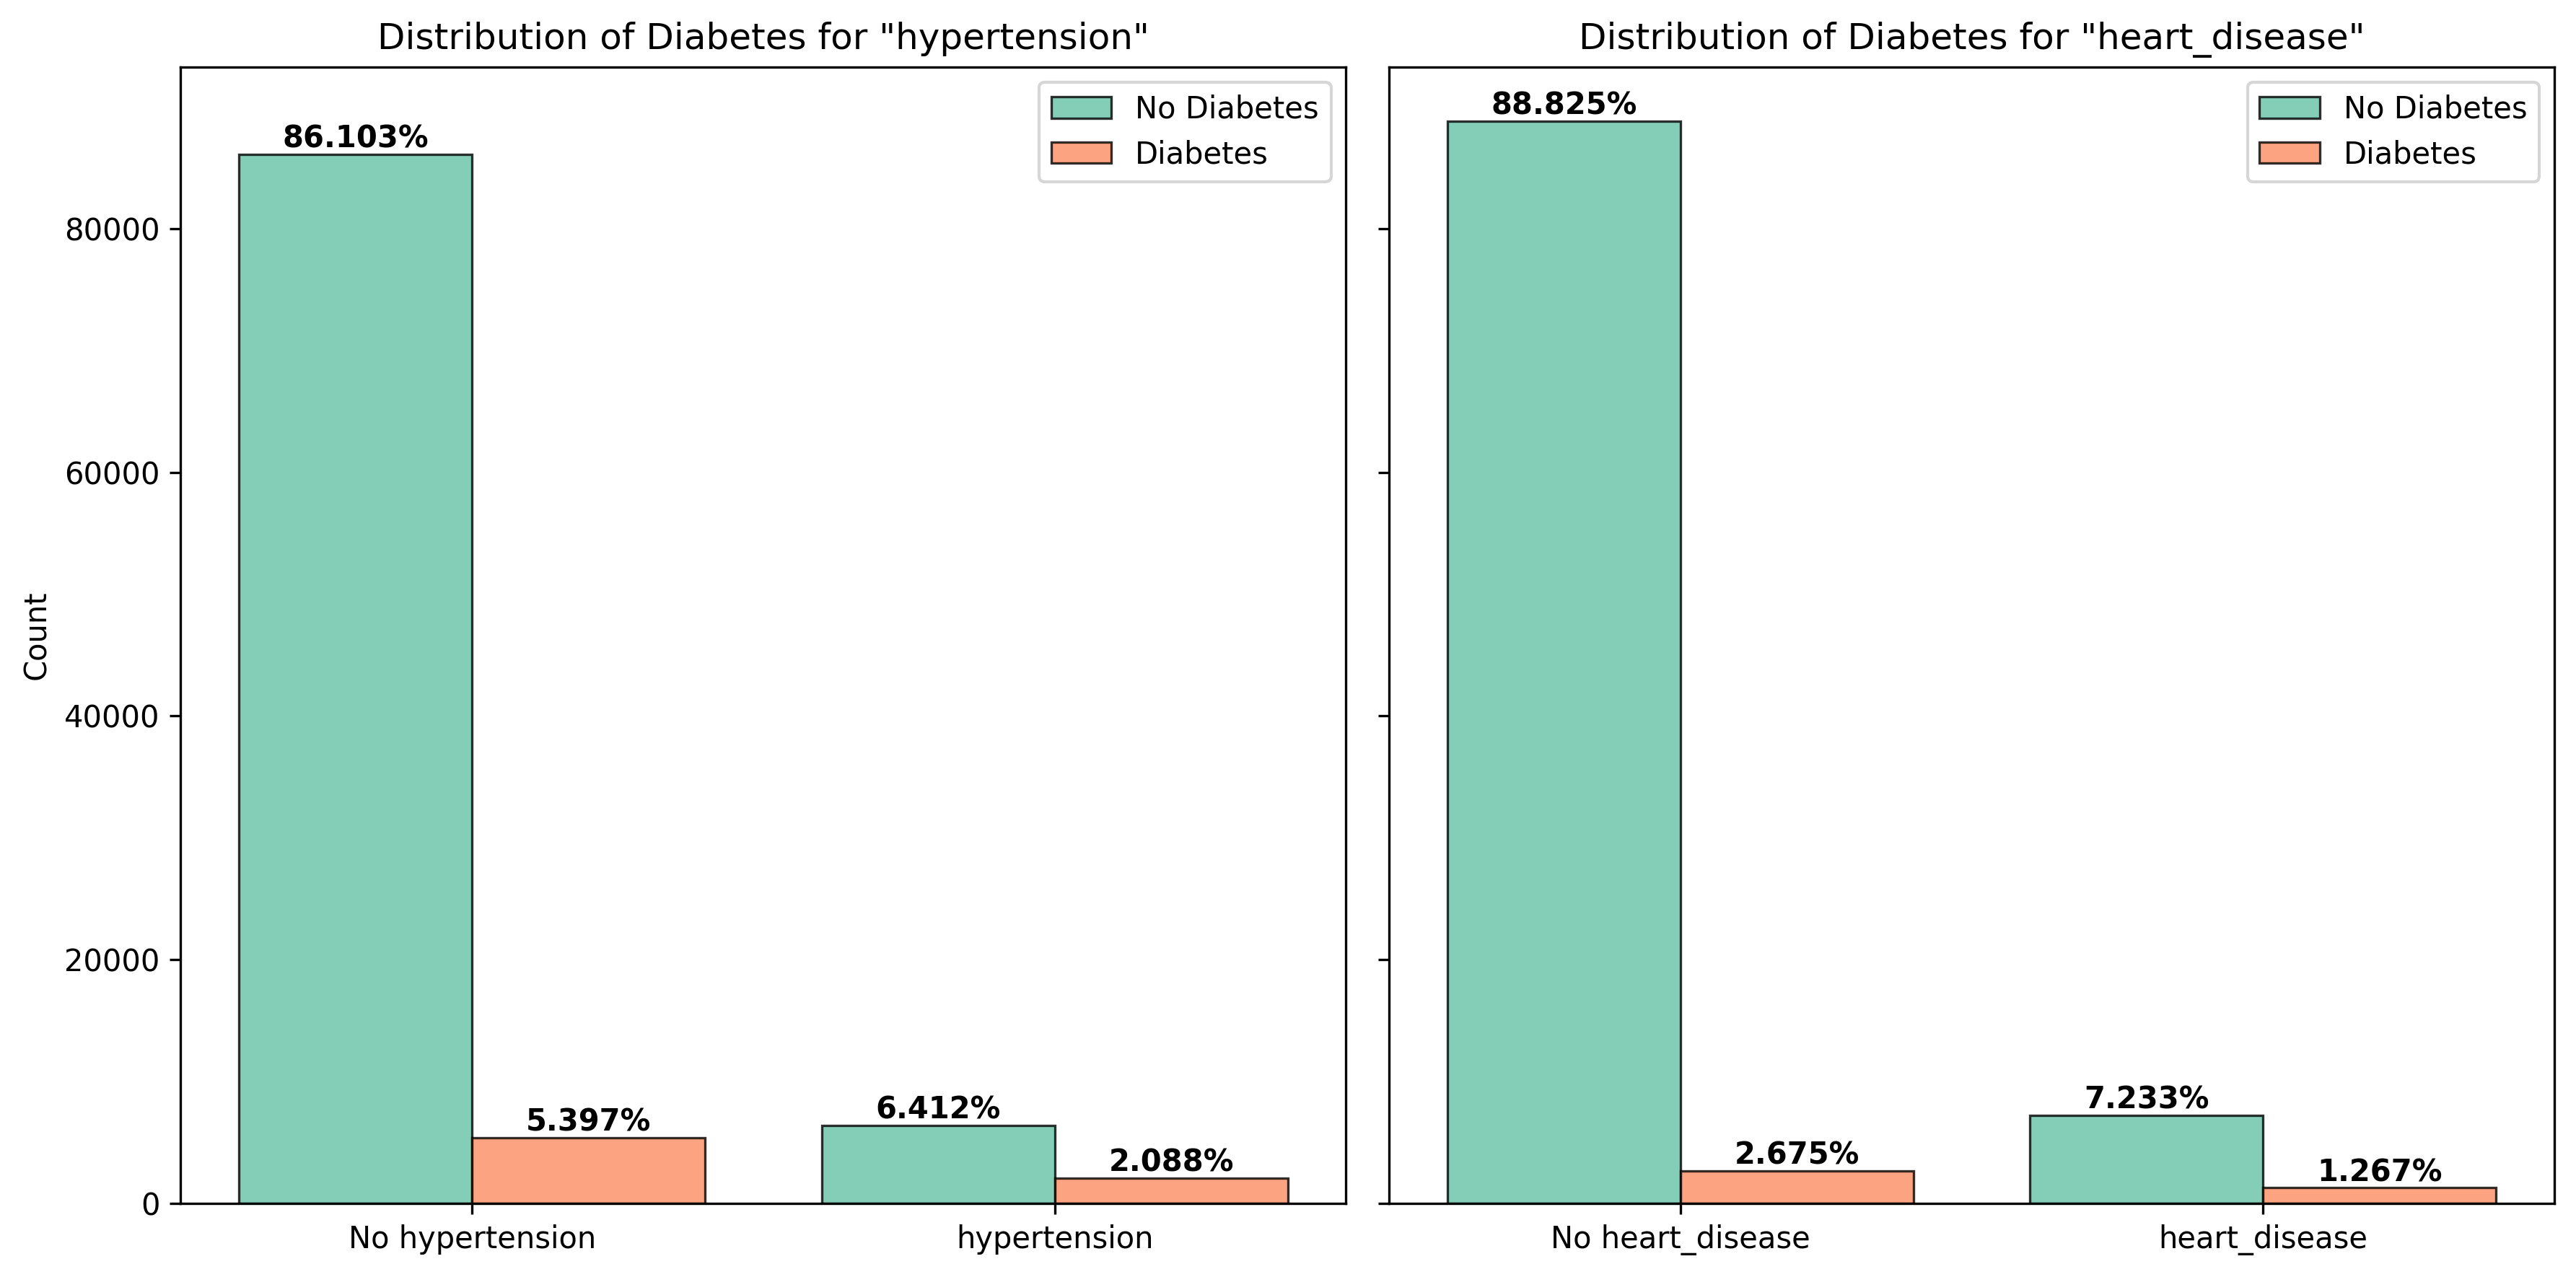

In [9]:
def plot_diabetes_for_features(features):
    num_features = len(features)
    fig, axes = plt.subplots(1, num_features, figsize=(6 * num_features, 6), sharey=True)

    if num_features == 1:
        axes = [axes] 

    for i, feature in enumerate(features):
        ax = axes[i]
        sns.countplot(x='diabetes', hue=feature, data=data, palette='Set2', linewidth=0.8, alpha=0.8, edgecolor='k', saturation=1, ax=ax)

        ax.set_title(f'Distribution of Diabetes for "{feature}"')
        ax.set_xticks([0, 1])
        ax.set_xticklabels([f'No {feature}', f'{feature}'])
        ax.set_xlabel('')
        ax.set_ylabel('Count')

        total = len(data)

        for rect in ax.patches:
            if (rect.get_x() == 0):
                continue
            height = rect.get_height()
            percentage = round(height / total * 100, 3)
            ax.annotate(f"{percentage}%", (rect.get_x() + rect.get_width() / 2, height + 0.05), ha="center", va="bottom", color='black', fontsize=10, fontweight='bold')

        ax.legend(labels=['No Diabetes', 'Diabetes'])

    plt.tight_layout()
    plt.show()

plot_diabetes_for_features(['hypertension', 'heart_disease'])

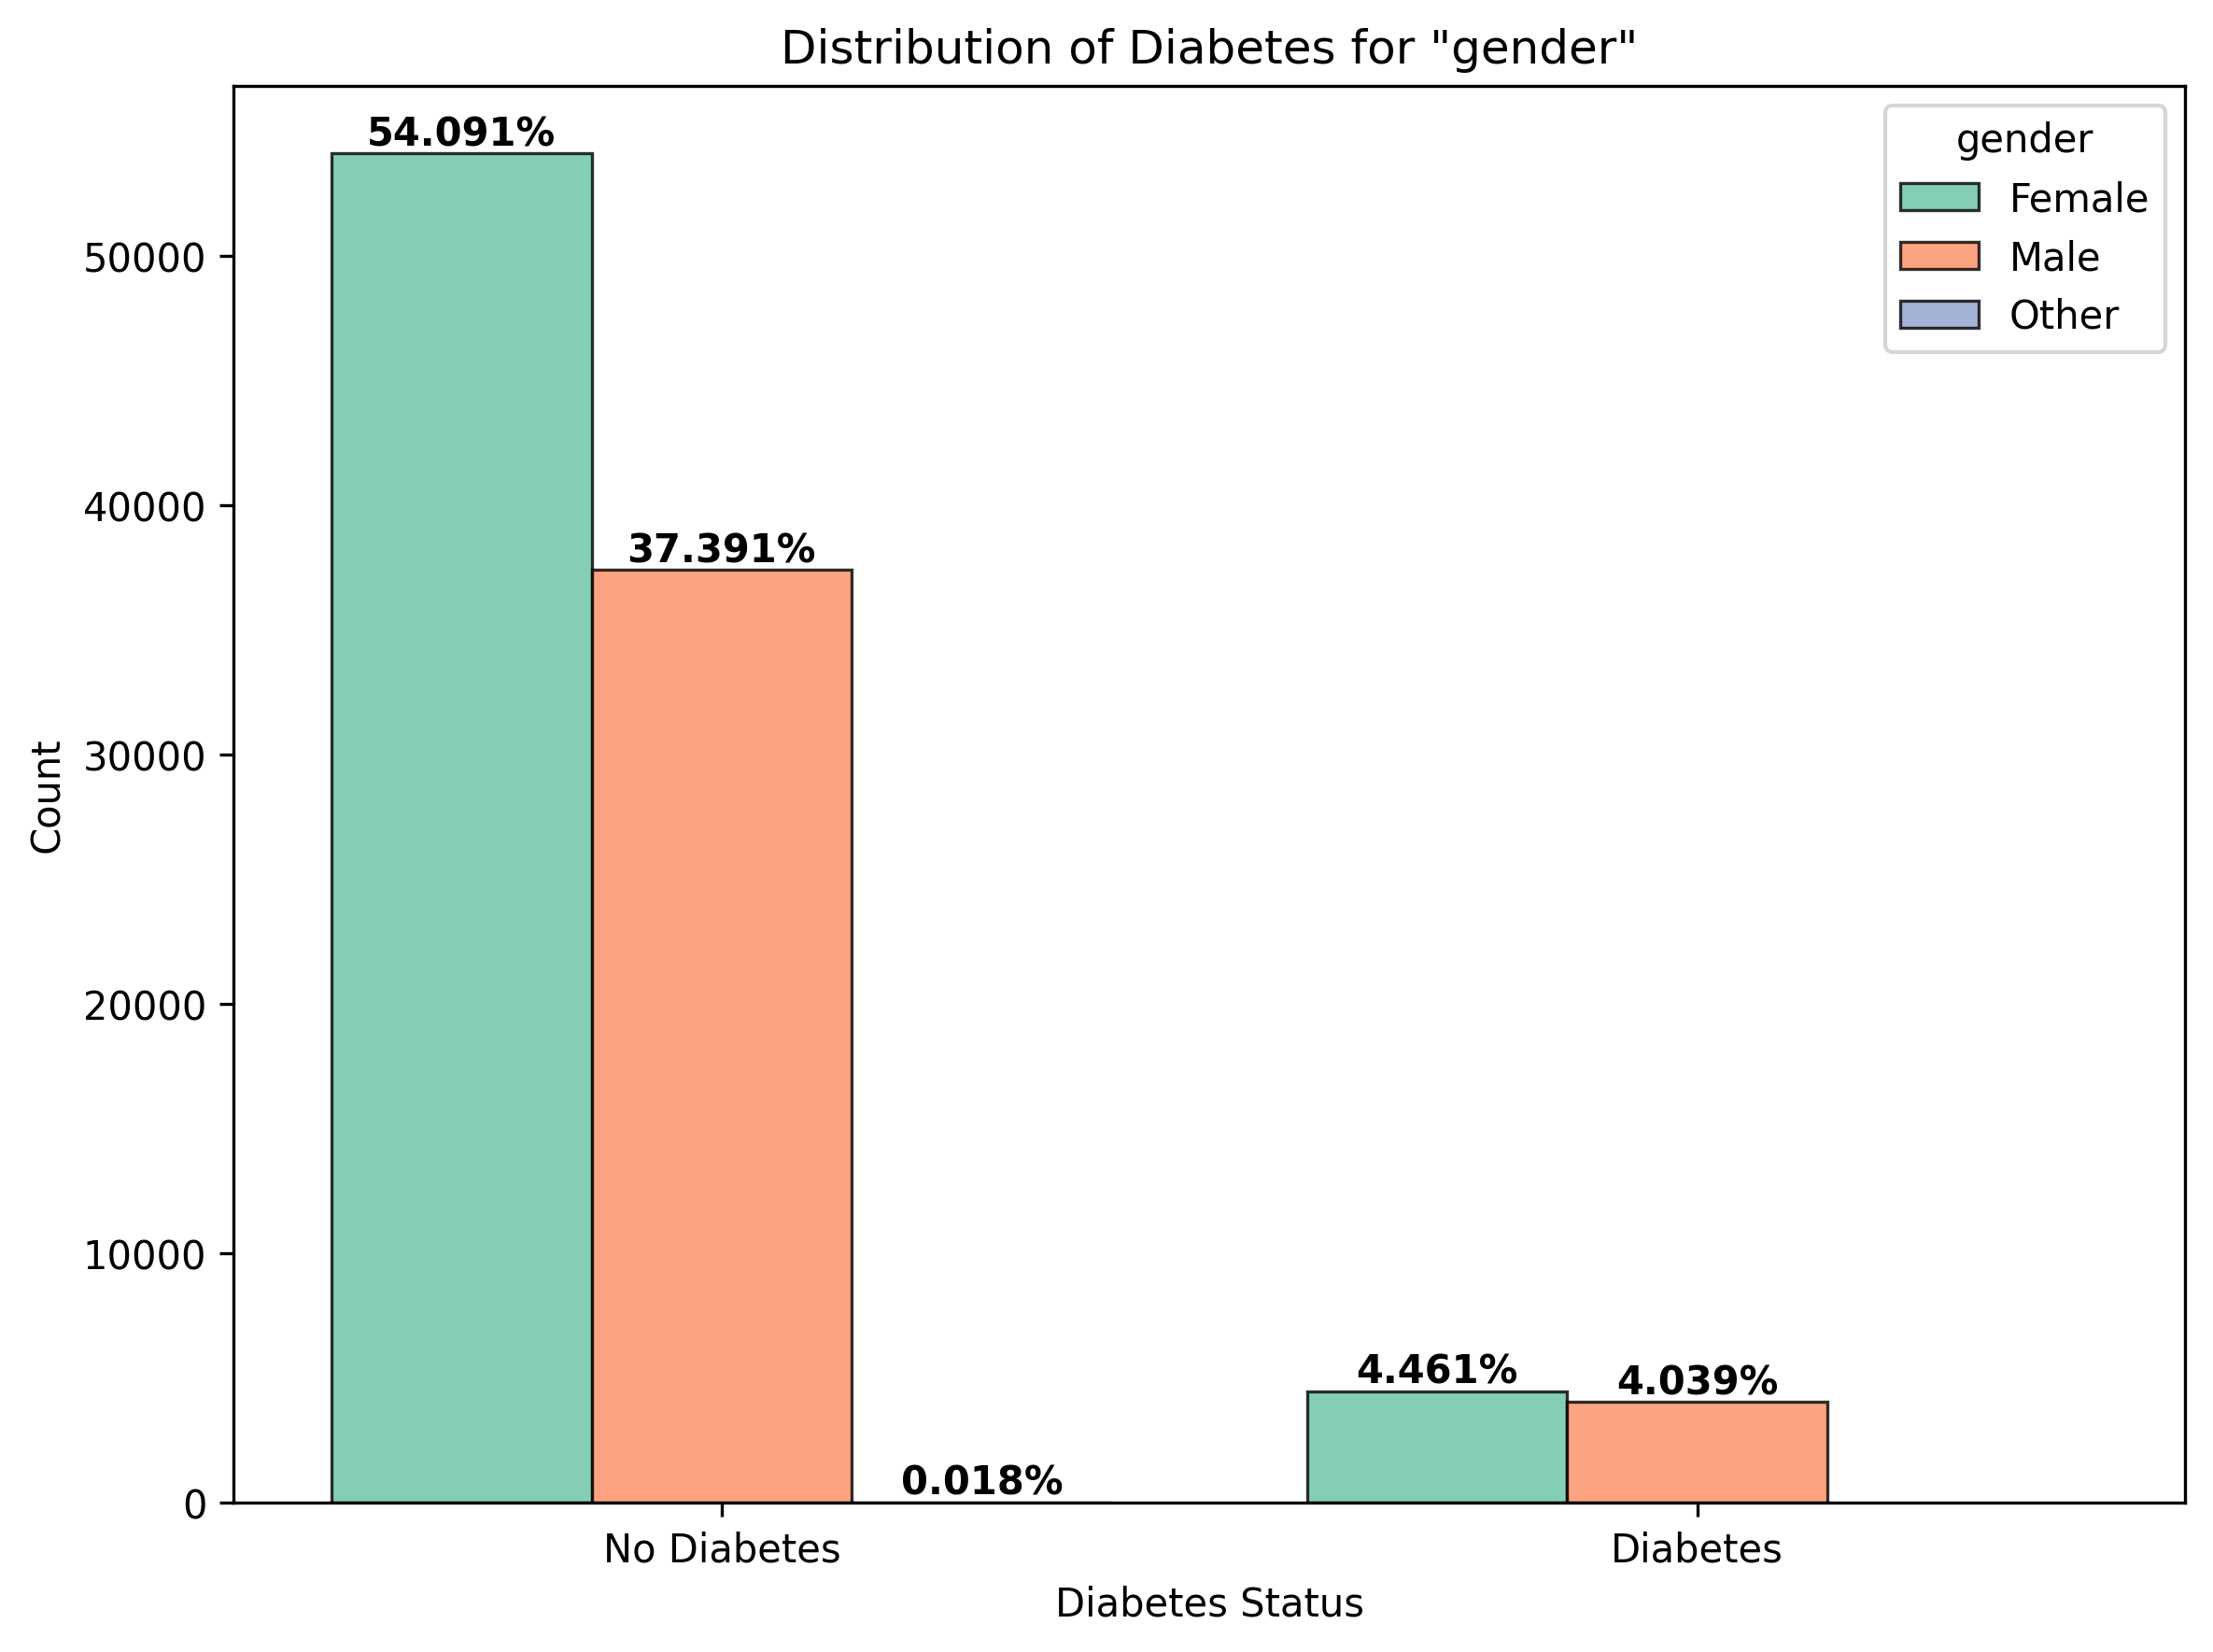

In [10]:
fig = plt.figure(figsize=(8,6))

ax = sns.countplot(x='diabetes', hue='gender', data=data, palette='Set2', linewidth=0.8, alpha=0.8, edgecolor='k', saturation=1)

plt.title('Distribution of Diabetes for "gender"')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.xlabel('Diabetes Status')
plt.ylabel('Count')

total = len(data)

for rect in ax.patches:
    if (rect.get_x() == 0):
        continue
    height = rect.get_height()
    percentage = round(height/total * 100, 3)
    plt.annotate("{}%".format(percentage), (rect.get_x() + rect.get_width()/2, height+.05), ha="center", va="bottom", color='black', fontsize=10, fontweight='bold')
    
plt.tight_layout()
plt.show()


### Comparison Between Age and Various Features vs Diabetes Diagnosis

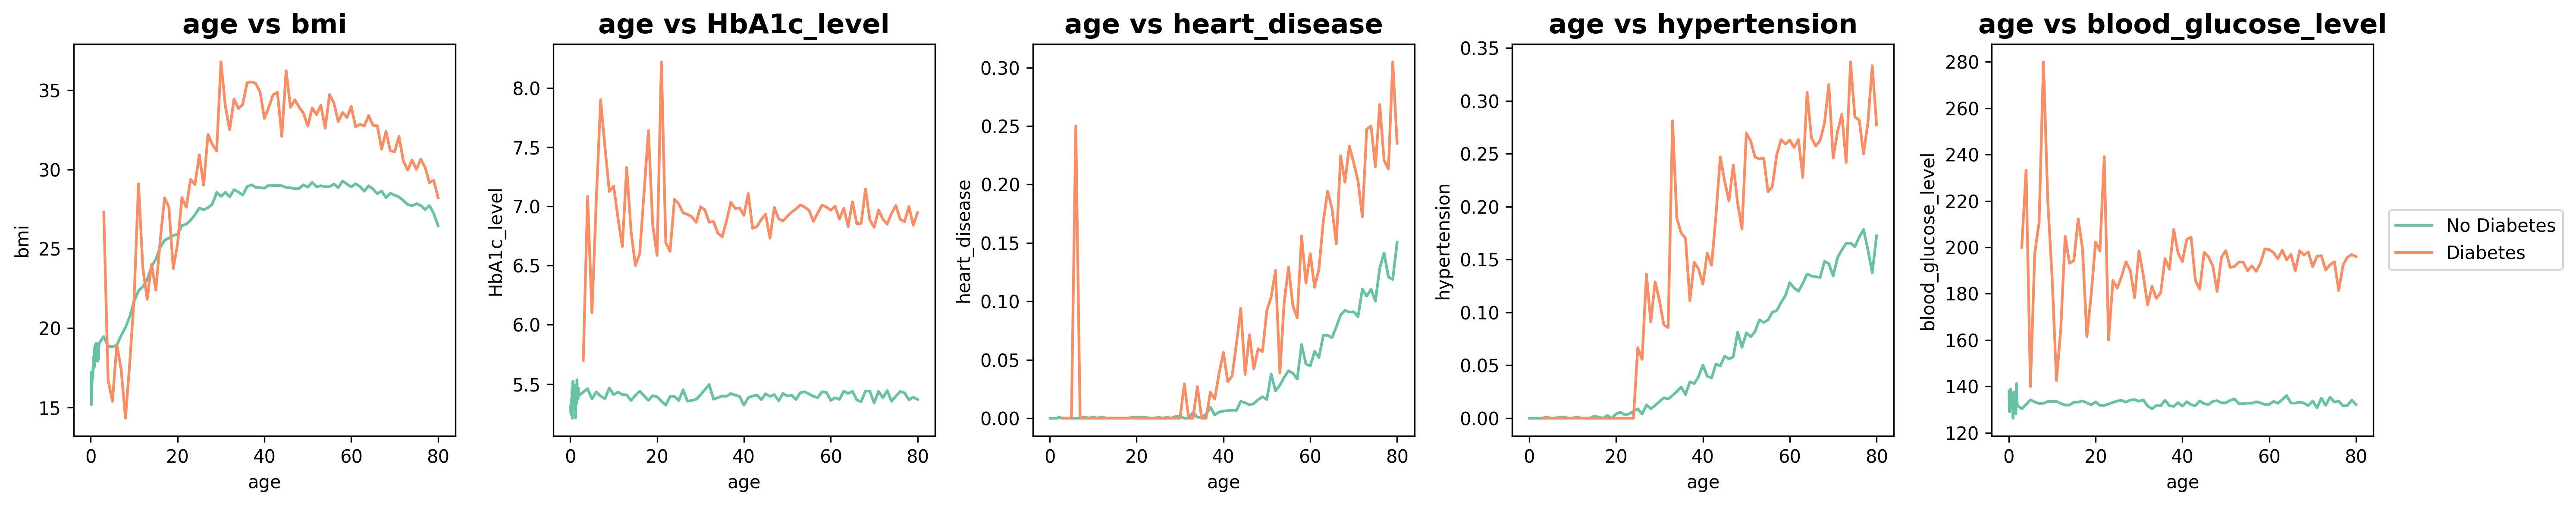

In [11]:
def numerical_feature_to_diabetes(x_var, y_vars):
    num_plots = len(y_vars)
    fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(20, 4))

    for i, y_var in enumerate(y_vars):
        ax = axes[i]
        sns.lineplot(x=data[x_var], y=data[y_var], hue=data['diabetes'], palette='Set2', errorbar=None, ax=ax)
        ax.set_title(f'{x_var} vs {y_var}', fontweight='bold', fontsize = 15)
        ax.set_xlabel(x_var)
        ax.set_ylabel(y_var)
        if i == num_plots-1:
            ax.legend(labels=['No Diabetes', 'Diabetes'], bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
        else:
            ax.get_legend().remove()

    plt.tight_layout()
    plt.show()

numerical_feature_to_diabetes('age', ['bmi', 'HbA1c_level', 'heart_disease', 'hypertension', 'blood_glucose_level'])

### Confusion Matrix

In [12]:
def one_hot_encoding(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)
    return df

data_temp = data.copy()
data_temp = one_hot_encoding(data_temp, 'gender')
data_temp = one_hot_encoding(data_temp, 'smoking_history')
# display(data_temp)

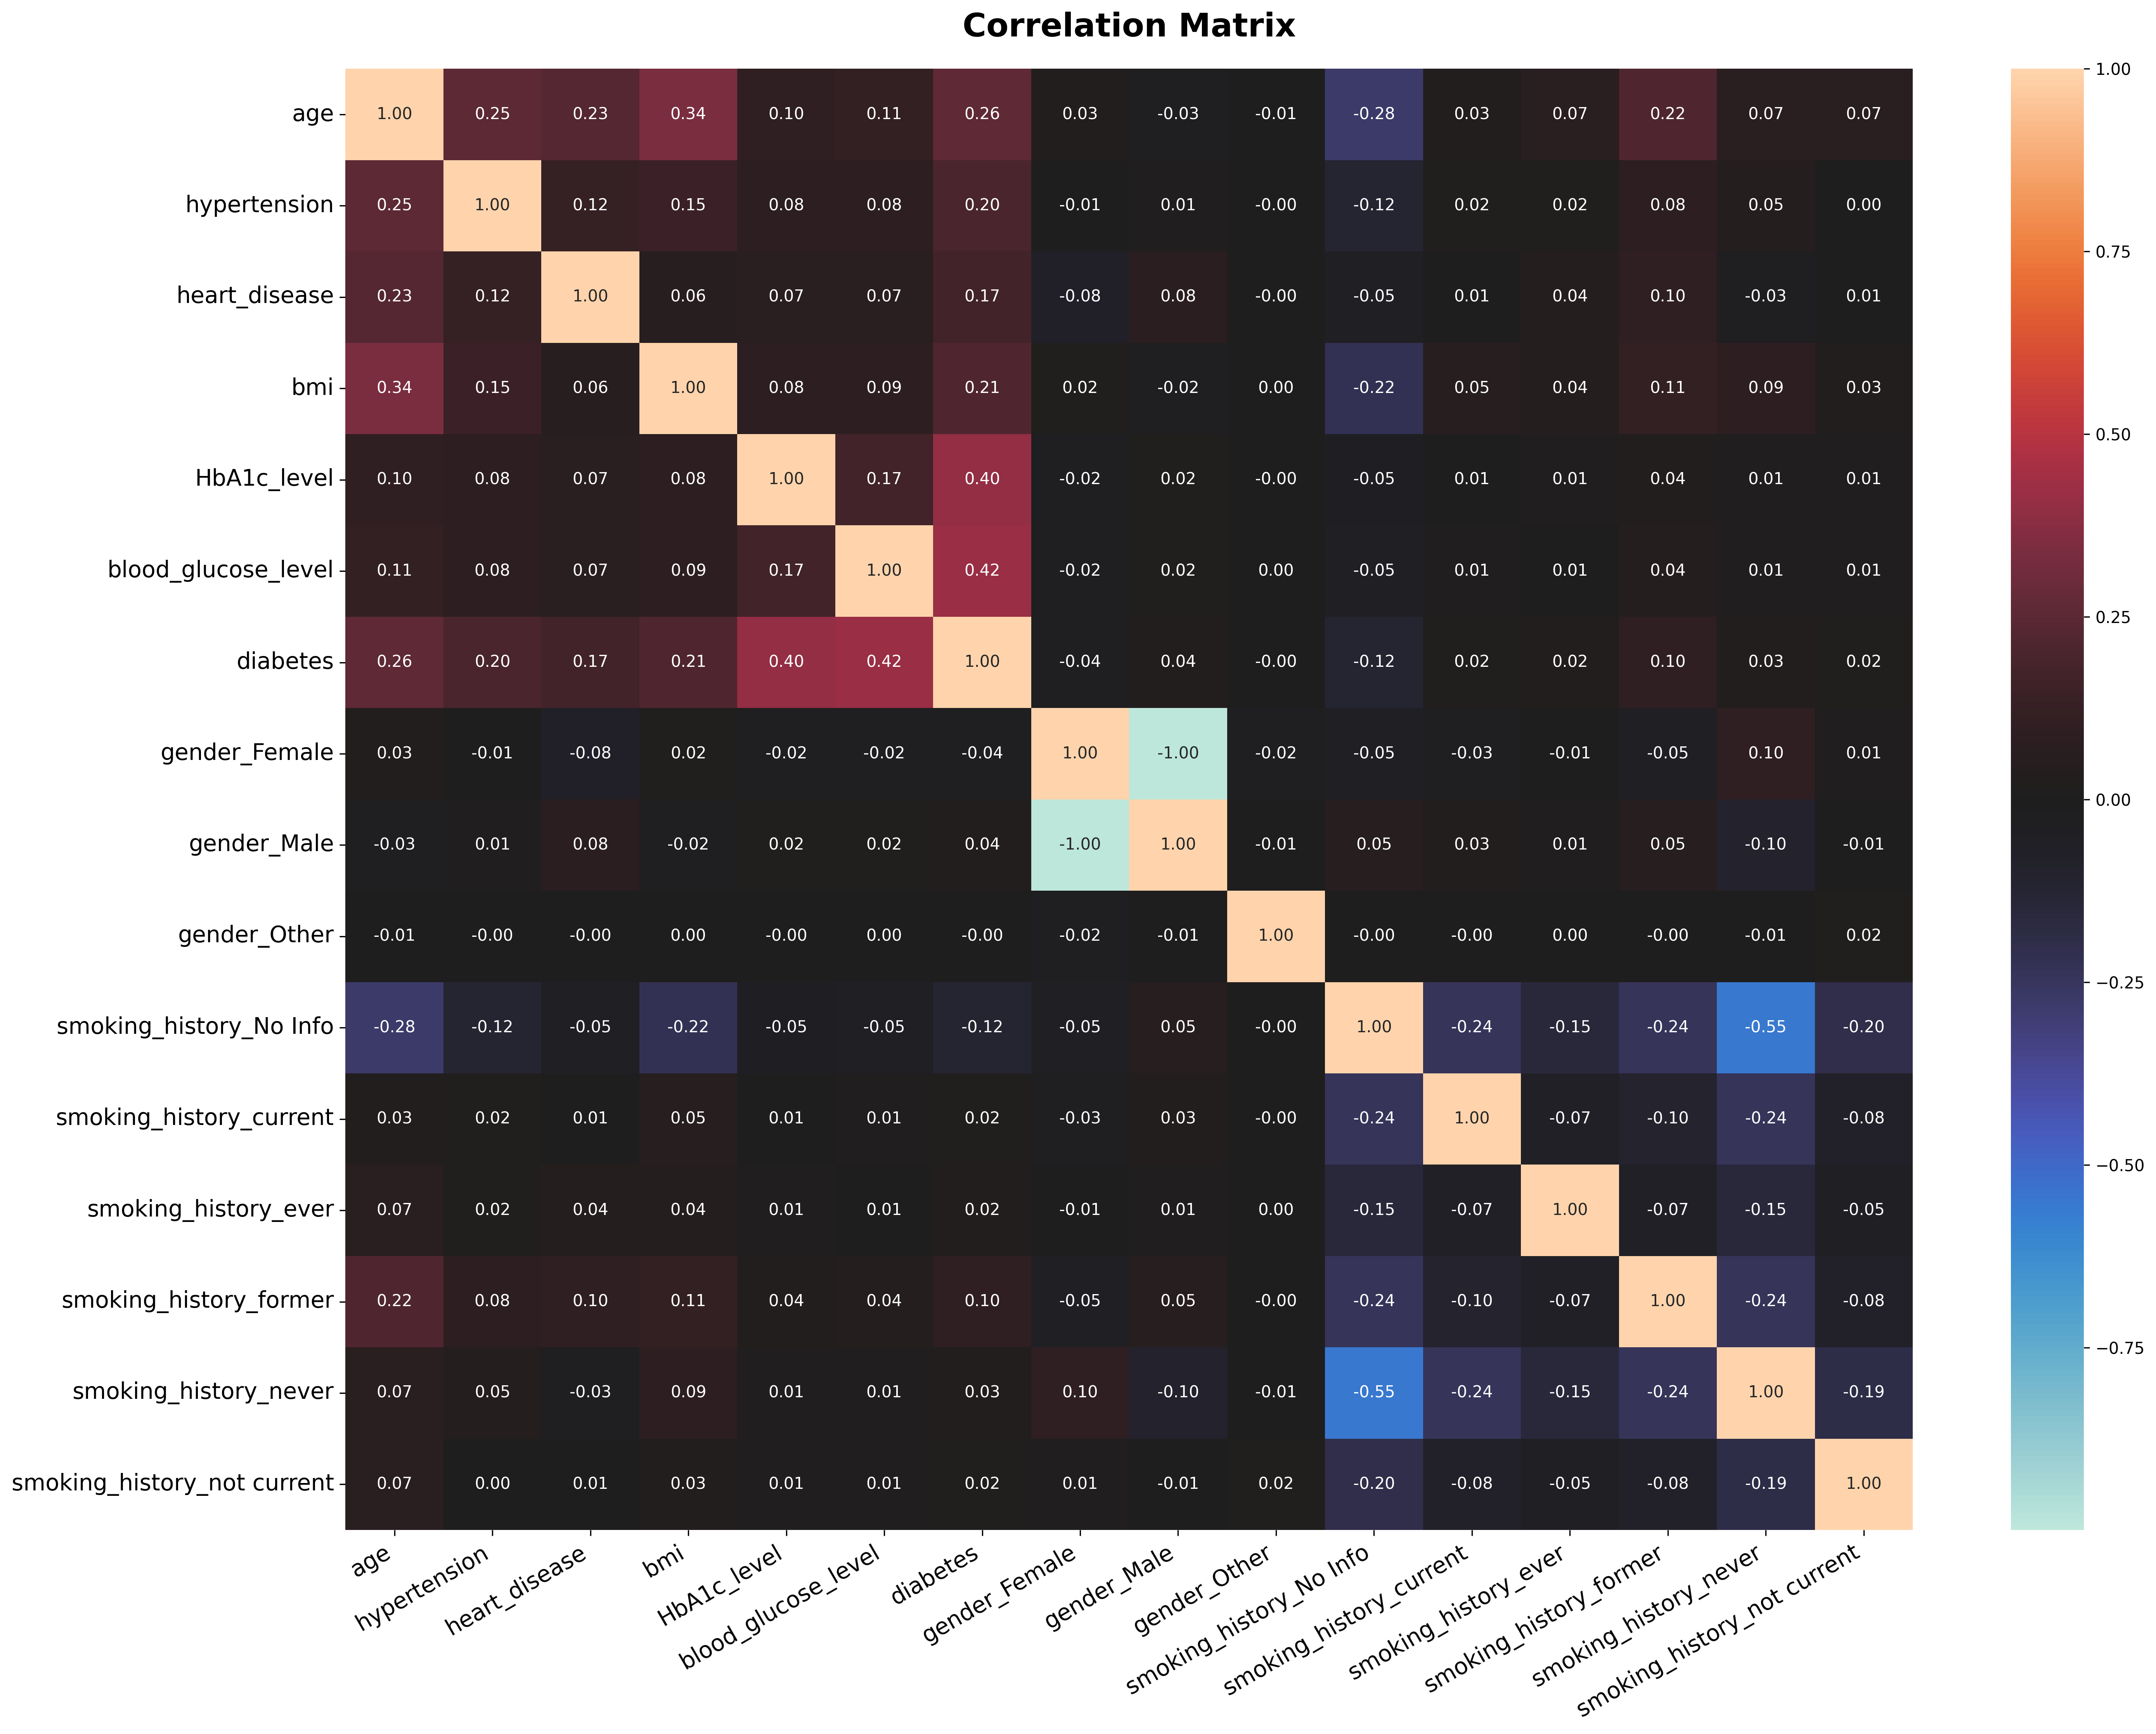

In [13]:
fig,ax = plt.subplots(figsize=[20,15])

sns.heatmap(data_temp.corr(), annot=True, fmt = '.2f', ax=ax, cmap='icefire')
ax.set_title("Correlation Matrix", fontsize=20, fontweight='bold', pad=20)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

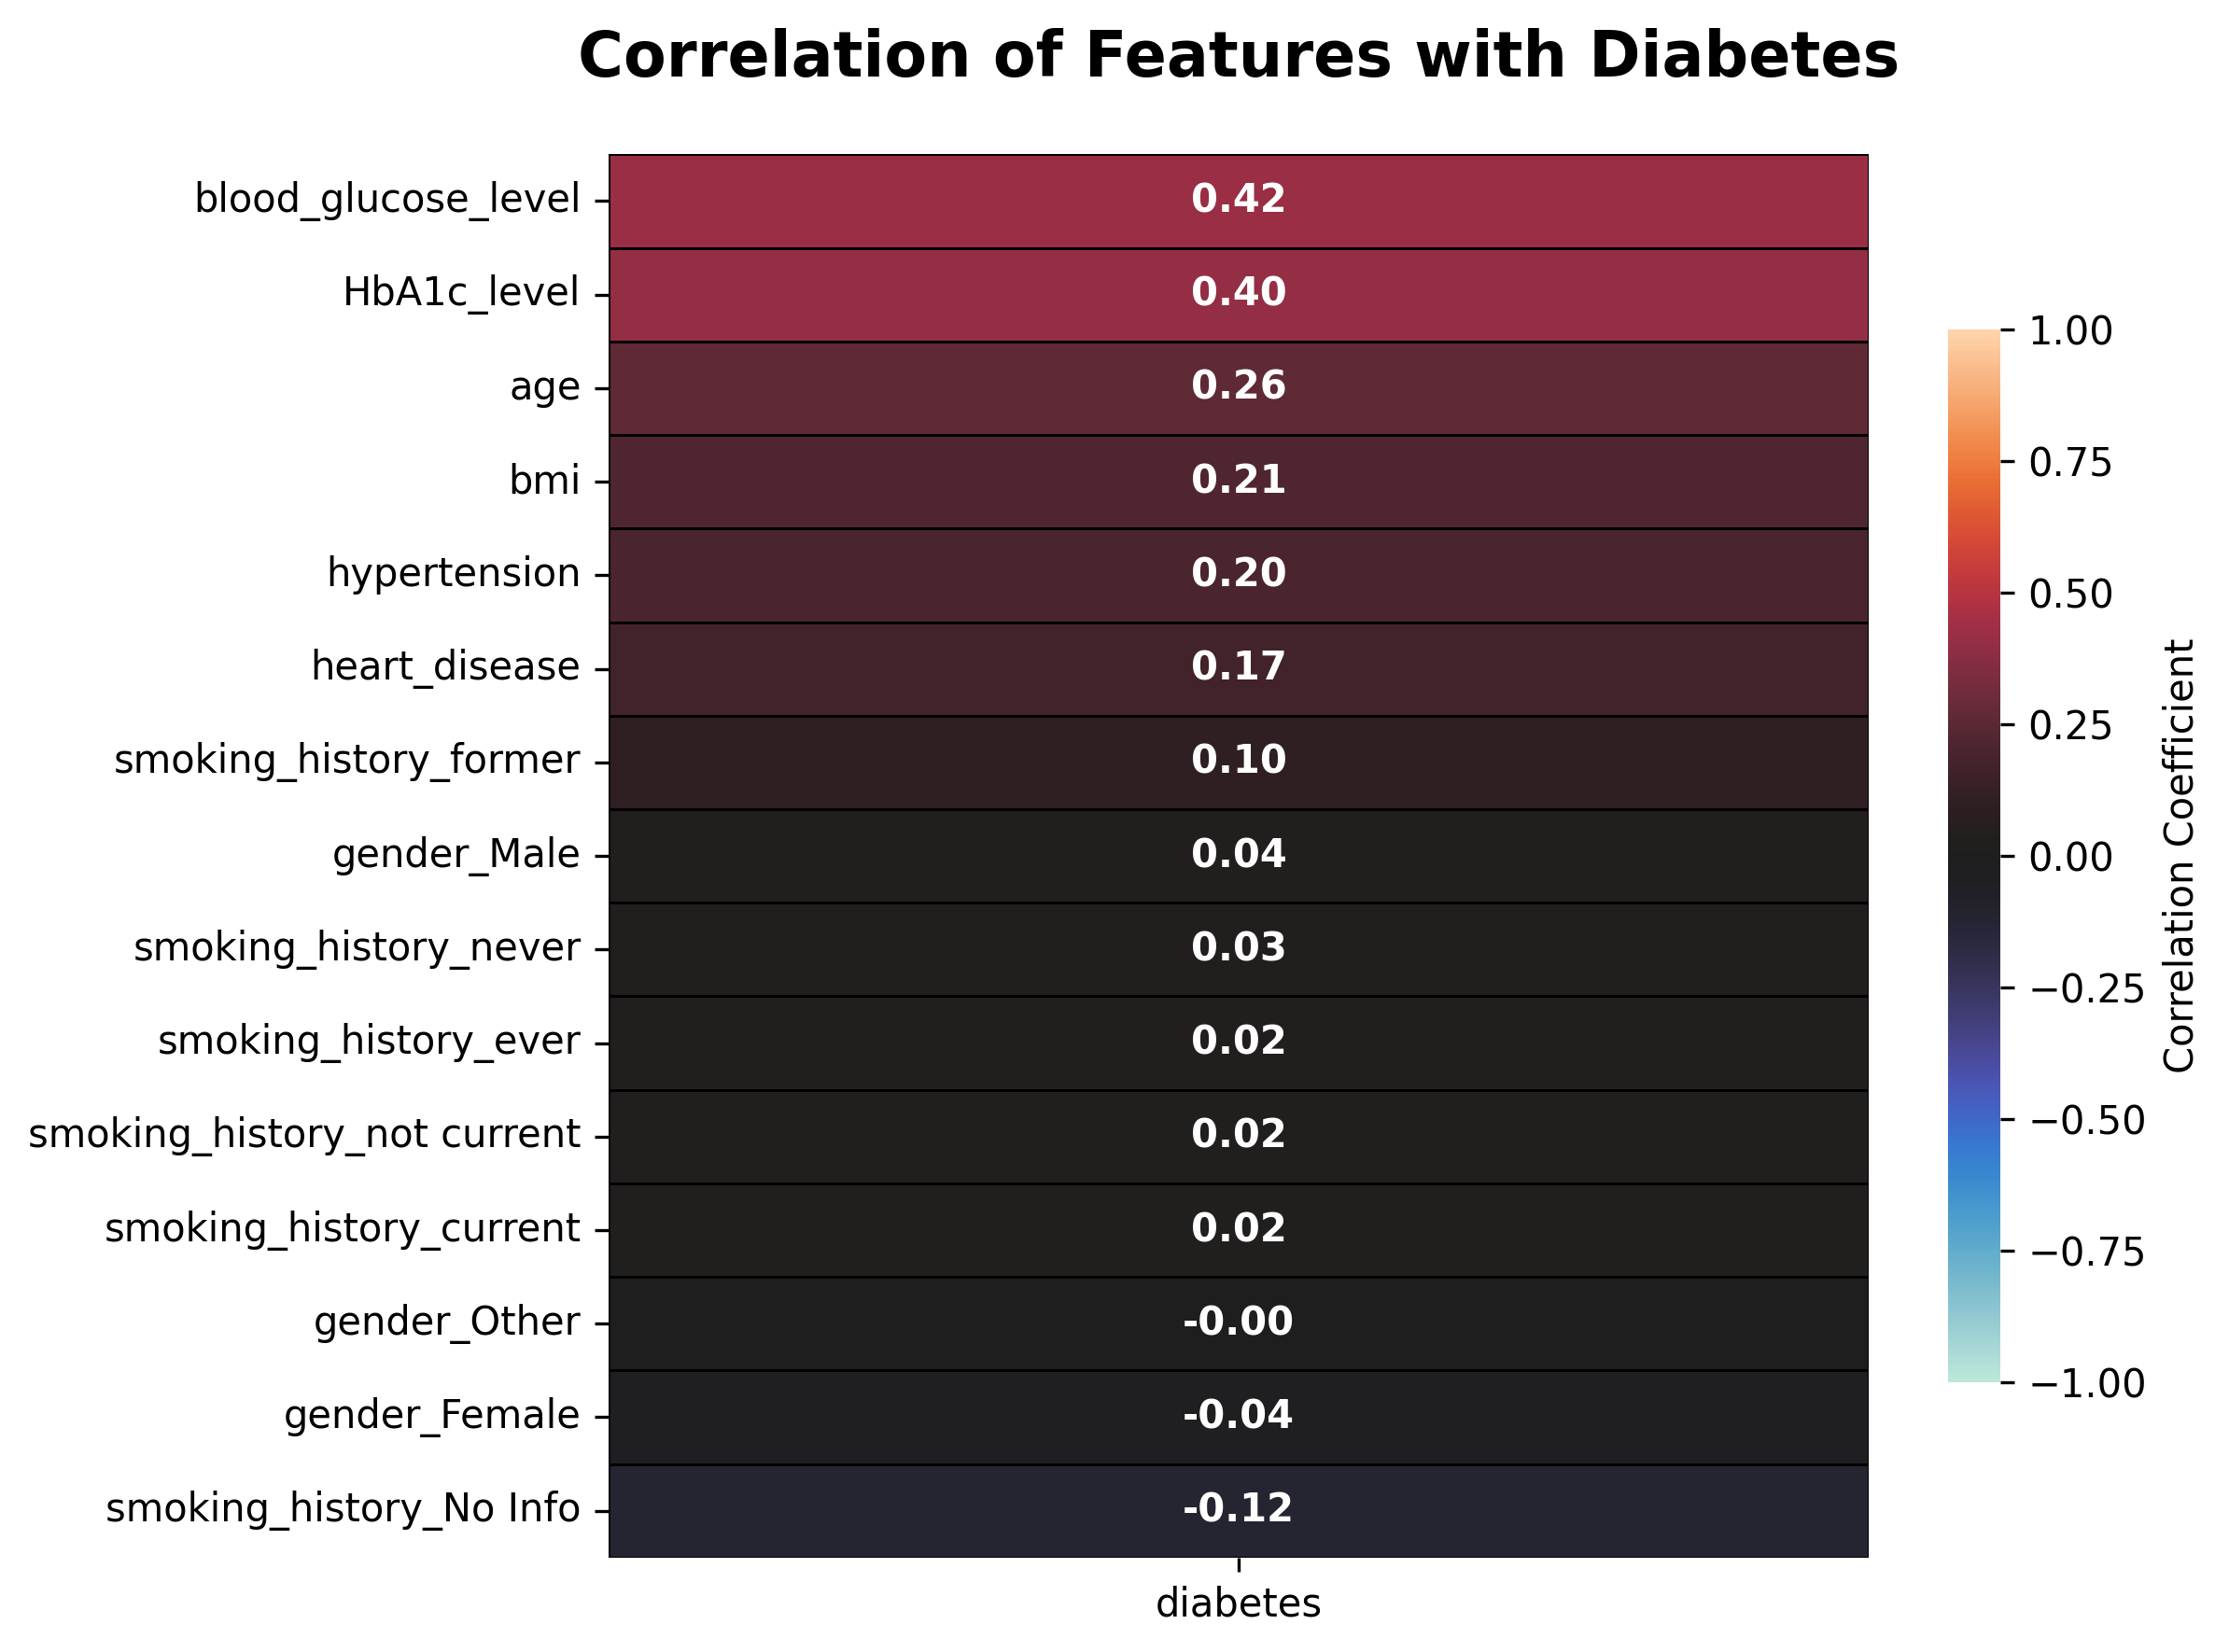

In [14]:
corr = data_temp.corr()
target_corr = corr['diabetes'].drop('diabetes')
target_corr_sorted = target_corr.sort_values(ascending=False)
plt.figure(figsize=(8, 6))

ax = sns.heatmap(
    target_corr_sorted.to_frame(),
    annot=True,
    fmt='.2f',
    cmap = 'icefire',
    linewidths=.7,
    linecolor='black',
    cbar_kws={"shrink": .75, 'label': 'Correlation Coefficient'},
    annot_kws={"size": 10, "weight": "bold"},
    vmin=-1, vmax=1
)

plt.title('Correlation of Features with Diabetes', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [15]:
display(data_temp.var())

age                             507.008078
hypertension                      0.069248
heart_disease                     0.037866
bmi                              44.046894
HbA1c_level                       1.146339
blood_glucose_level            1657.152341
diabetes                          0.077776
gender_Female                     0.242689
gender_Male                       0.242658
gender_Other                      0.000180
smoking_history_No Info           0.229884
smoking_history_current           0.084238
smoking_history_ever              0.038437
smoking_history_former            0.084775
smoking_history_never             0.227786
smoking_history_not current       0.060314
dtype: float64

## Data Preprocessing

In [16]:
# find categorical cols
categorical_columns = data.select_dtypes(include = ['object']).columns
for col in categorical_columns:
    print(f'\nUnique values in {col}:')
    print(data[col].value_counts())


Unique values in gender:
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

Unique values in smoking_history:
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


In [17]:
# split the data into features (X) and target (y)
X = data.drop('diabetes', axis = 1)
y = data['diabetes']

In [18]:
# preprocess categorical variables
le = LabelEncoder()

X['gender'] = le.fit_transform(X['gender']) 
X['smoking_history'] = le.fit_transform(X['smoking_history'])

In [19]:
# mapping of original categories to encoded values

encoded_gender = le.fit_transform(data['gender'])
gender_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print('Gender label encoding:')
for category, encoded_value in gender_mapping.items():
    print(f'\t{category}: {encoded_value}')

encoded_smoking_history = le.fit_transform(data['smoking_history'])
smoking_history_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print('Smoking history label encoding:')
for category, encoded_value in smoking_history_mapping.items():
    print(f'\t{category}: {encoded_value}')
    

Gender label encoding:
	Female: 0
	Male: 1
	Other: 2
Smoking history label encoding:
	No Info: 0
	current: 1
	ever: 2
	former: 3
	never: 4
	not current: 5


In [20]:
# scale numerical features

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

print('preprocessed training data:')
display(X.head())

preprocessed training data:


0         1         2         3         4         5         6  \
0 -0.841047  1.692704 -0.284439  4.936379  0.963327 -0.321056  1.001706   
1 -0.841047  0.538006 -0.284439 -0.202578 -1.153468 -0.000116  1.001706   
2  1.187234 -0.616691 -0.284439 -0.202578  0.963327 -0.000116  0.161108   
3 -0.841047 -0.261399 -0.284439 -0.202578 -0.624269 -0.583232 -0.492690   
4  1.187234  1.515058  3.515687  4.936379 -0.624269 -1.081970 -0.679490   

          7  
0  0.047704  
1 -1.426210  
2  0.489878  
3  0.416183  
4  0.416183

In [21]:
# split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 105)

print('Shape of training set:', X_train.shape)
print('Shape of testing set:', X_test.shape)

Shape of training set: (80000, 8)
Shape of testing set: (20000, 8)


## Fitting Classification Models

In [22]:
seed = 42
random.seed(seed)

classification_models = {'Logistic Regression': LogisticRegression(max_iter=200, solver='liblinear', random_state=seed),
                         'Naive Bayes': GaussianNB(var_smoothing = 1e-3),
                         'Random Forest': RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=6, n_estimators=50, random_state=seed),
                         'Neural Net': MLPClassifier(alpha=0.01, hidden_layer_sizes=(500,), learning_rate='adaptive', max_iter=500, random_state=seed),
                         'KNN': KNeighborsClassifier(n_neighbors=5),
                         'SVM': SVC(probability=True, kernel='linear', random_state=seed)
                         }

def fit_model(class_model):
    model = classification_models[class_model]
    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)

    training_acc = model.score(X_train, y_train)
    testing_acc = model.score(X_test, y_test)

    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    
    # confusion matrix metrics

    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_test_pred)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    specificity = tn / (tn + fp)
    negative_predictive_value = tn / (tn + fn)

    outputs = pd.DataFrame({'Model': [class_model], 
                           'Training Accuracy': [training_acc], 
                           'Testing Accuracy': [testing_acc],
                           'Weighted Testing F1 Score': [f1_test]})
    
    cf_metrics = pd.DataFrame({'Model': [class_model], 
                               'Precision': [precision], 
                               'Sensitivity (Recall)': [recall],
                               'Specificity': [specificity],
                               'Negative Predictive Value': [negative_predictive_value],
                               'Accuracy': [accuracy]})   
    

    
    return outputs, cf_metrics

In [23]:
classifier_results = pd.DataFrame()
cf_results = pd.DataFrame()

for model in classification_models:
    print(f"\nRunning {model}...")
    result, cf_metrics = fit_model(model)
    classifier_results = pd.concat([classifier_results, result], ignore_index = True)
    cf_results = pd.concat([cf_results, cf_metrics], ignore_index = True)



Running Logistic Regression...

Running Naive Bayes...

Running Random Forest...

Running Neural Net...

Running KNN...

Running SVM...


In [24]:
classifier_results = classifier_results.sort_values(by='Weighted Testing F1 Score', ascending = False)
display(classifier_results.style.hide(axis = "index").set_caption("Evaluation Results of Classifier Models").format(precision=4))

In [25]:
cf_results = cf_results.sort_values(by='Accuracy', ascending = False)
display(cf_results.style.hide(axis = "index").set_caption("Confusion Matrix Metrics of Classifier Models").format(precision=4))

### Fitting models on PCA data

In [26]:
pca = PCA(n_components = 2)
# pca_data = pca.fit_transform(X)
pca.fit(X)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

pca_classifier_results = pd.DataFrame()
pca_cf_results = pd.DataFrame()

for model in classification_models:
    print(f"\nRunning {model}...")
    result, cf_metrics = fit_model(model)
    pca_classifier_results = pd.concat([pca_classifier_results, result], ignore_index = True)
    pca_cf_results = pd.concat([pca_cf_results, cf_metrics], ignore_index = True)

pca_classifier_results = pca_classifier_results.sort_values(by='Weighted Testing F1 Score', ascending = False)
display(pca_classifier_results.style.hide(axis = "index").set_caption("Evaluation Results of Classifier Models with PCA").format(precision=4))

pca_cf_results = pca_cf_results.sort_values(by='Accuracy', ascending = False)
display(pca_cf_results.style.hide(axis = "index").set_caption("Confusion Matrix Metrics of Classifier Models with PCA").format(precision=4))


Running Logistic Regression...

Running Naive Bayes...

Running Random Forest...

Running Neural Net...

Running KNN...

Running SVM...


In [27]:
# def plot_decision_boundaries(classification_models):
#     fig, axes = plt.subplots(1, 3, figsize=(12, 4))

#     for i, (model_name, model) in enumerate(classification_models.items()):
#         model.fit(X_train, y_train)
        
#         x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
#         y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
#         xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
#                               np.linspace(y_min, y_max, 100))

#         Z = model.predict(np.column_stack((xx.ravel(), yy.ravel())))
#         Z = Z.reshape(xx.shape)

#         # decision boundary and the data points
#         ax = axes[i]
#         ax.contourf(xx, yy, Z, alpha = 0.5, cmap = 'RdBu')
        
#         unique_labels = np.unique(y_train)
#         cm_bright = ['#FF0000', '#0000FF']

#         for i in range(len(unique_labels)):
#             label_indices = np.where(y_train == i)[0]
#             ax.scatter(X_train[label_indices, 0], X_train[label_indices, 1], 
#                        label = int(i), color = cm_bright[i], edgecolors='k')
        
#         ax.legend()
#         ax.set_title(f"{model_name}")

#     plt.suptitle("Decision Boundaries of Classification Models\n(0 = no diabetes, 1 = diabetes)", fontweight = 'bold')
#     plt.tight_layout()
#     plt.show()
    
# plot_decision_boundaries(classification_models)

### Sample ROC curve

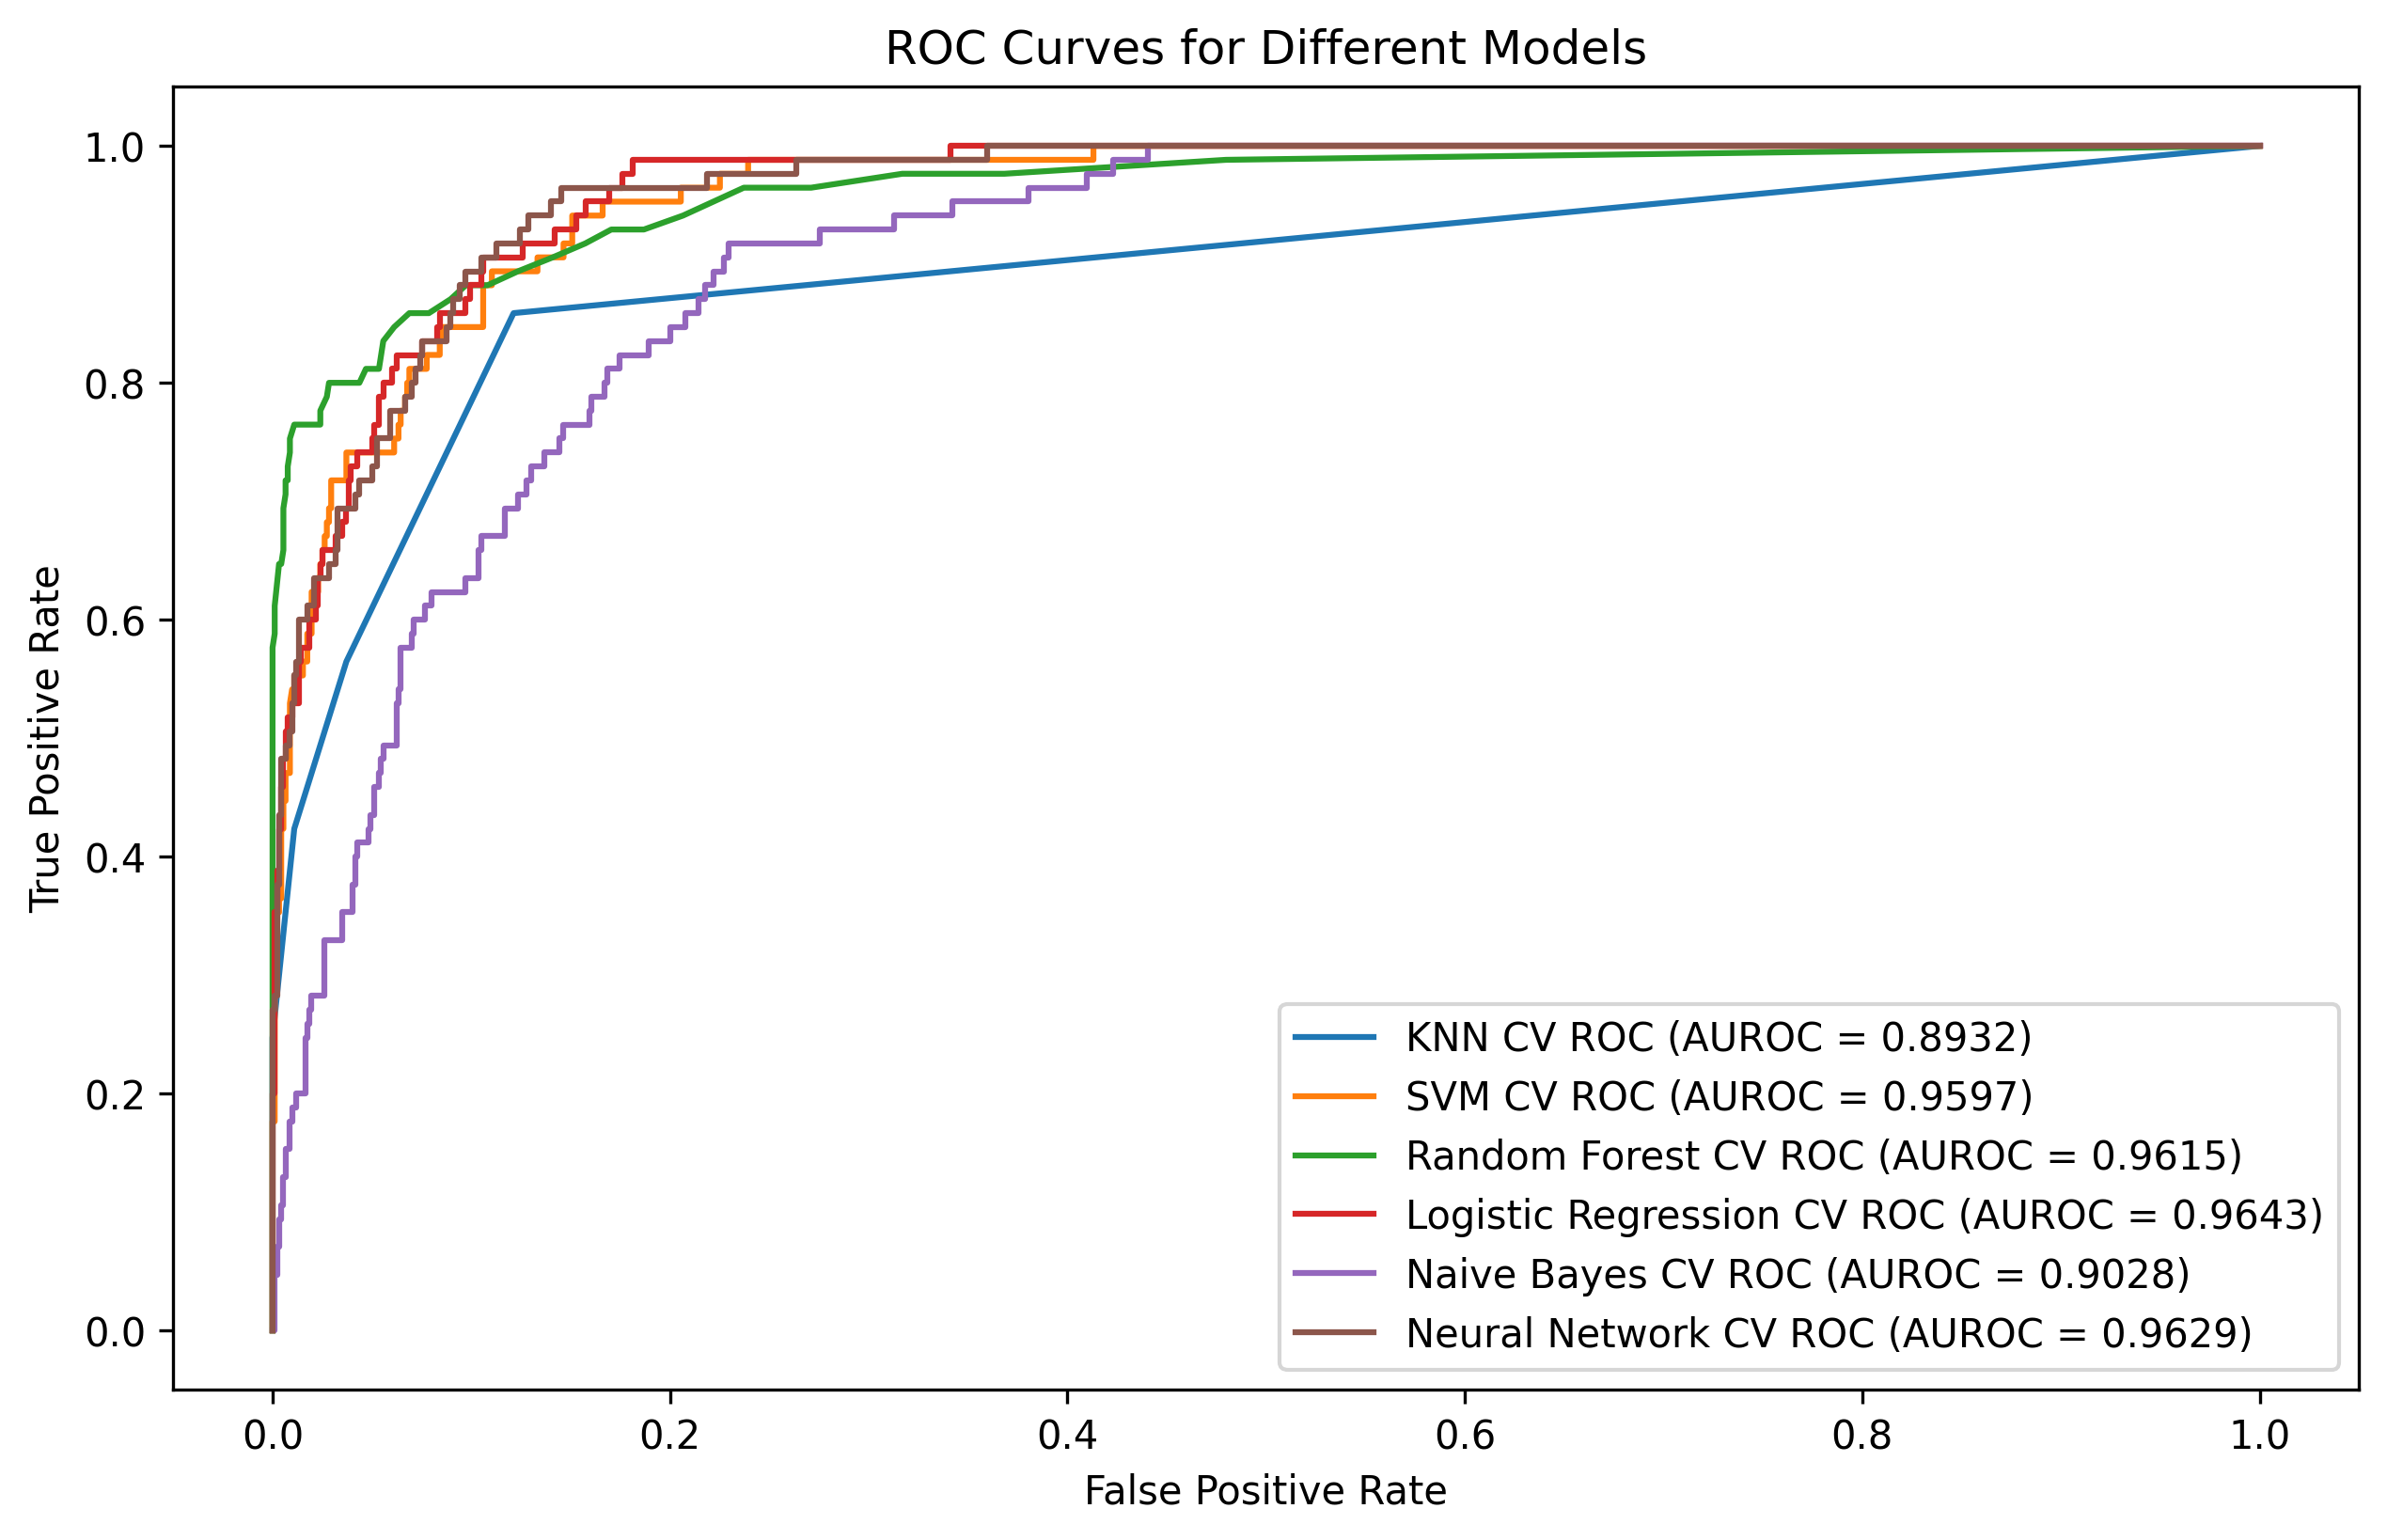

In [28]:
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('diabetes_prediction_dataset.csv')

# Subsample the data if it's too large
data = data.sample(n=1000, random_state=42)

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Ensure target column is not included in categorical_cols
output = data.columns[-1]
if output in categorical_cols:
    categorical_cols.remove(output)

# Define features and target variable
X = data.drop(columns=[output])  # Features
y = data[output]  # Target variable

# Preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns), ('cat', OneHotEncoder(), categorical_cols)], remainder='passthrough')

# Initialize pipelines for different models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(probability=True, kernel='linear', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42)}

# Plot ROC Curves
plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    y_proba_cv = cross_val_predict(pipeline, X, y, cv=5, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(y, y_proba_cv)
    auroc = roc_auc_score(y, y_proba_cv)
    plt.plot(fpr, tpr, label=f'{model_name} CV ROC (AUROC = {auroc:.4f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='best')
plt.show()
 